# Pandas Mastery Challenge - Ultimate Tutorial

Welcome to the ultimate challenge in our Pandas series! This notebook is designed to test your data manipulation skills to the fullest. Each problem is carefully crafted to cover various aspects of Pandas and provide you with an enriching learning experience.

### **Enjoy the challenges? Show your support with an upvote!**

## Table of Contents
1. [Q1 - The Great Data Merge Maze](#q1)
2. [Q2 - Time Travel with Multi-Index](#q2)
3. [Q3 - The GroupBy Gauntlet](#q3)
4. [Q4 - Regex Riddles in Data Cleaning](#q4)
5. [Q5 - Speed Demon Data Manipulation](#q5)
6. [Q6 - Recursive Riddle](#q6)
7. [Q7 - Statistician's Nightmare](#q7)
8. [Q8 - Pivot Table Puzzles](#q8)
9. [Q9 - Aggregation Aggravation](#q9)
10. [Q10 - Visual Magic with Pandas](#q10)
11. [Q11 - Nested Data Labyrinth](#q11)
12. [Q12 - Async Adventures in Data](#q12)
13. [Q13 - Geo Pandas Adventure](#q13)
14. [Q14 - Network Nexus Analysis](#q14)
15. [Q15 - High Dimensional Hide and Seek](#q15)
16. [Q16 - Real-time Data Rush](#q16)
17. [Q17 - Machine Learning Preprocess Pandemonium](#q17)
18. [Q18 - Text Tango with Pandas](#q18)
19. [Q19 - Anomaly Detection Drama](#q19)
20. [Q20 - Imputation Imbroglio](#q20)


# Q1 - The Great Data Merge Maze
<a id="q1"></a>


**Question:**
Welcome to the Great Data Merge Maze! You are given three datasets: `customers`, `orders`, and `products`. Your task is to merge these datasets to answer the following questions:
1. Which customers ordered which products and at what price?
2. Calculate the total amount spent by each customer.
3. Identify the top 2 customers who spent the most.
4. Determine which products were never ordered.
5. Find the customer who ordered the highest quantity of a single product.

**Datasets:**
- `customers`: Contains customer IDs and names.
- `orders`: Contains order IDs, customer IDs, product IDs, and order quantities.
- `products`: Contains product IDs, names, and prices.

Generate synthetic data for the datasets and merge them to find the answers.


In [1]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Customers DataFrame
customers = pd.DataFrame({
    'customer_id': range(1, 11),
    'customer_name': ['Alice Apples', 'Bob Bananas', 'Charlie Cherries', 'David Dates', 'Eve Elderberries', 'Frank Figs', 'Grace Grapes', 'Hannah Honeydew', 'Ivy Iceberg', 'Jack Jicama']
})

# Products DataFrame
products = pd.DataFrame({
    'product_id': range(1, 11),
    'product_name': ['Widget Wonder', 'Gizmo Glitz', 'Doodad Delight', 'Thingamajig Thrill', 'Contraption Charm', 'Gadget Glow', 'Whatchamacallit Whimsy', 'Doohickey Dazzle', 'Whatsit Whiz', 'Gubbins Galore'],
    'product_price': np.random.uniform(10, 100, size=10).round(2)
})

# Orders DataFrame
orders = pd.DataFrame({
    'order_id': range(1, 21),
    'customer_id': np.random.choice(customers['customer_id'], size=20),
    'product_id': np.random.choice(products['product_id'], size=20),
    'order_quantity': np.random.randint(1, 10, size=20)
})

# Display the datasets
print("Customers DataFrame:")
print(customers, "\n")
print("Products DataFrame:")
print(products, "\n")
print("Orders DataFrame:")
print(orders)


Customers DataFrame:
   customer_id     customer_name
0            1      Alice Apples
1            2       Bob Bananas
2            3  Charlie Cherries
3            4       David Dates
4            5  Eve Elderberries
5            6        Frank Figs
6            7      Grace Grapes
7            8   Hannah Honeydew
8            9       Ivy Iceberg
9           10       Jack Jicama 

Products DataFrame:
   product_id            product_name  product_price
0           1           Widget Wonder          59.39
1           2             Gizmo Glitz          74.37
2           3          Doodad Delight          64.25
3           4      Thingamajig Thrill          59.04
4           5       Contraption Charm          48.13
5           6             Gadget Glow          68.13
6           7  Whatchamacallit Whimsy          49.38
7           8        Doohickey Dazzle          90.26
8           9            Whatsit Whiz          96.73
9          10          Gubbins Galore          44.51 

Orders Da

## Solution Explanation

The steps to solve this problem are:
1. Merge the `orders` and `customers` DataFrames on `customer_id` to get customer information with their orders.
2. Merge the resulting DataFrame with the `products` DataFrame on `product_id` to get the product prices along with the customer orders.
3. Calculate the total amount spent by each customer.
4. Identify the top 2 customers who spent the most.
5. Determine which products were never ordered.
6. Find the customer who ordered the highest quantity of a single product.

Let's implement these steps in the following code.


In [2]:
# Step 1: Merge orders with customers to get customer information in orders
# This merge operation will give us a DataFrame that includes each order with the corresponding customer information.
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')
print("Step 1: Orders merged with Customers")
print(orders_customers, "\n")

Step 1: Orders merged with Customers
    order_id  customer_id  product_id  order_quantity     customer_name
0          1            7           4               9      Grace Grapes
1          2            8           4               5   Hannah Honeydew
2          3            8           8               2   Hannah Honeydew
3          4            9           1               5       Ivy Iceberg
4          5            2           2               9       Bob Bananas
5          6            6          10               2        Frank Figs
6          7           10          10               2       Jack Jicama
7          8            9           1               8       Ivy Iceberg
8          9           10           5               4       Jack Jicama
9         10            5           8               7  Eve Elderberries
10        11            4           4               8       David Dates
11        12            1           3               3      Alice Apples
12        13            4  

In [3]:
# Step 2: Merge the resulting DataFrame with products to get product prices
# This merge operation will add the product details (name and price) to each order.
orders_customers_products = pd.merge(orders_customers, products, on='product_id', how='inner')
print("Step 2: Orders merged with Customers and Products")
print(orders_customers_products, "\n")

Step 2: Orders merged with Customers and Products
    order_id  customer_id  product_id  order_quantity     customer_name  \
0          1            7           4               9      Grace Grapes   
1          2            8           4               5   Hannah Honeydew   
2          3            8           8               2   Hannah Honeydew   
3          4            9           1               5       Ivy Iceberg   
4          5            2           2               9       Bob Bananas   
5          6            6          10               2        Frank Figs   
6          7           10          10               2       Jack Jicama   
7          8            9           1               8       Ivy Iceberg   
8          9           10           5               4       Jack Jicama   
9         10            5           8               7  Eve Elderberries   
10        11            4           4               8       David Dates   
11        12            1           3             

In [4]:
# Step 3: Select relevant columns and display the final merged DataFrame
# We are interested in customer names, product names, product prices, and order quantities.
final_result = orders_customers_products[['customer_name', 'product_name', 'product_price', 'order_quantity']]
print("Step 3: Final Merged DataFrame")
print(final_result, "\n")

Step 3: Final Merged DataFrame
       customer_name            product_name  product_price  order_quantity
0       Grace Grapes      Thingamajig Thrill          59.04               9
1    Hannah Honeydew      Thingamajig Thrill          59.04               5
2    Hannah Honeydew        Doohickey Dazzle          90.26               2
3        Ivy Iceberg           Widget Wonder          59.39               5
4        Bob Bananas             Gizmo Glitz          74.37               9
5         Frank Figs          Gubbins Galore          44.51               2
6        Jack Jicama          Gubbins Galore          44.51               2
7        Ivy Iceberg           Widget Wonder          59.39               8
8        Jack Jicama       Contraption Charm          48.13               4
9   Eve Elderberries        Doohickey Dazzle          90.26               7
10       David Dates      Thingamajig Thrill          59.04               8
11      Alice Apples          Doodad Delight          64.

In [5]:
# Step 4: Calculate the total amount spent by each customer
# We need to multiply the product price by the order quantity for each row and then sum it up per customer.
orders_customers_products['total_price'] = orders_customers_products['product_price'] * orders_customers_products['order_quantity']
customer_spending = orders_customers_products.groupby('customer_name')['total_price'].sum().reset_index()
customer_spending = customer_spending.rename(columns={'total_price': 'total_spent'})
print("Step 4: Total Amount Spent by Each Customer")
print(customer_spending, "\n")

Step 4: Total Amount Spent by Each Customer
      customer_name  total_spent
0      Alice Apples       549.09
1       Bob Bananas      1009.98
2  Charlie Cherries       296.95
3       David Dates      1050.13
4  Eve Elderberries       631.82
5        Frank Figs       346.02
6      Grace Grapes       531.36
7   Hannah Honeydew       475.72
8       Ivy Iceberg      1248.98
9       Jack Jicama       281.54 



In [6]:
# Step 5: Identify the top 2 customers who spent the most
# Sort the customers by the total amount spent in descending order and take the top 2.
top_customers = customer_spending.sort_values(by='total_spent', ascending=False).head(2)
print("Step 5: Top 2 Customers Who Spent the Most")
print(top_customers, "\n")

Step 5: Top 2 Customers Who Spent the Most
  customer_name  total_spent
8   Ivy Iceberg      1248.98
3   David Dates      1050.13 



In [7]:
# Step 6: Determine which products were never ordered
# Find the products that are not present in the orders DataFrame.
ordered_products = orders['product_id'].unique()
all_products = products['product_id'].unique()
never_ordered_products = products[~products['product_id'].isin(ordered_products)]
print("Step 6: Products Never Ordered")
print(never_ordered_products, "\n")

Step 6: Products Never Ordered
   product_id  product_name  product_price
8           9  Whatsit Whiz          96.73 



In [8]:
# Step 7: Find the customer who ordered the highest quantity of a single product
# Identify the maximum order quantity and the corresponding customer and product.
max_order = orders_customers_products.loc[orders_customers_products['order_quantity'].idxmax()]
print("Step 7: Customer Who Ordered the Highest Quantity of a Single Product")
print(max_order[['customer_name', 'product_name', 'order_quantity']])

Step 7: Customer Who Ordered the Highest Quantity of a Single Product
customer_name           Grace Grapes
product_name      Thingamajig Thrill
order_quantity                     9
Name: 0, dtype: object


# Q2 - Time Travel with Multi-Index
<a id="q2"></a>

**Question:**
Welcome to Time Travel with Multi-Index! You are given a multi-index time series dataset of sales data for different regions and product categories. Your task is to perform advanced time series analysis and manipulation to answer the following questions:
1. What is the total sales for each region and product category over time?
2. Calculate the moving average of sales for each region and product category.
3. Identify the region with the highest sales growth rate.
4. Determine the top-selling product category for each region.
5. Find the month with the highest overall sales.

**Datasets:**
- `sales_data`: Contains multi-index (region, product_category) and columns (date, sales).



In [9]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(1)

# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='ME')

# Regions and product categories
regions = ['North Pole', 'South Pole', 'East Egg', 'Westworld']
product_categories = ['Gizmos', 'Widgets', 'Doodads', 'Thingamajigs']

# Generate synthetic sales data
data = []
for region in regions:
    for category in product_categories:
        sales = np.random.randint(1000, 5000, size=len(date_range))
        for date, sale in zip(date_range, sales):
            data.append([region, category, date, sale])

# Create DataFrame
sales_data = pd.DataFrame(data, columns=['Region', 'Product_Category', 'Date', 'Sales'])

# Set multi-index
sales_data.set_index(['Region', 'Product_Category', 'Date'], inplace=True)

# Display the dataset
print("Sales Data DataFrame:")
print(sales_data)


Sales Data DataFrame:
                                        Sales
Region     Product_Category Date             
North Pole Gizmos           2023-01-31   2061
                            2023-02-28   1235
                            2023-03-31   4980
                            2023-04-30   2096
                            2023-05-31   4839
...                                       ...
Westworld  Thingamajigs     2023-08-31   3224
                            2023-09-30   2590
                            2023-10-31   4087
                            2023-11-30   3949
                            2023-12-31   2425

[192 rows x 1 columns]


## Solution Explanation

The steps to solve this problem are:
1. Calculate the total sales for each region and product category over time.
2. Calculate the moving average of sales for each region and product category.
3. Identify the region with the highest sales growth rate.
4. Determine the top-selling product category for each region.
5. Find the month with the highest overall sales.

Let's implement these steps in the following code.


In [10]:
# Step 1: Calculate the total sales for each region and product category over time
# First, we'll group the data by Region and Product Category, then resample it to monthly frequency and sum the sales.
total_sales = sales_data.groupby(['Region', 'Product_Category']).resample('ME', level='Date').sum()
print("Step 1: Total Sales for Each Region and Product Category Over Time")
print(total_sales, "\n")

Step 1: Total Sales for Each Region and Product Category Over Time
                                       Sales
Region    Product_Category Date             
East Egg  Doodads          2023-01-31   2393
                           2023-02-28   2869
                           2023-03-31   2795
                           2023-04-30   3944
                           2023-05-31   2277
...                                      ...
Westworld Widgets          2023-08-31   3464
                           2023-09-30   4212
                           2023-10-31   4265
                           2023-11-30   1606
                           2023-12-31   4644

[192 rows x 1 columns] 



In [11]:
# Step 2: Calculate the moving average of sales for each region and product category
# We'll calculate a rolling window average with a window size of 3 months.
moving_avg_sales = total_sales.groupby(level=['Region', 'Product_Category']).rolling(window=3).mean()
print("Step 2: Moving Average of Sales for Each Region and Product Category")
print(moving_avg_sales.reset_index(level=[0, 1]), "\n")

Step 2: Moving Average of Sales for Each Region and Product Category
                                          Region Product_Category        Sales
Region    Product_Category Date                                               
East Egg  Doodads          2023-01-31   East Egg          Doodads          NaN
                           2023-02-28   East Egg          Doodads          NaN
                           2023-03-31   East Egg          Doodads  2685.666667
                           2023-04-30   East Egg          Doodads  3202.666667
                           2023-05-31   East Egg          Doodads  3005.333333
...                                          ...              ...          ...
Westworld Widgets          2023-08-31  Westworld          Widgets  4248.000000
                           2023-09-30  Westworld          Widgets  4136.000000
                           2023-10-31  Westworld          Widgets  3980.333333
                           2023-11-30  Westworld          Widg

In [12]:
# Step 3: Identify the region with the highest sales growth rate
# We'll calculate the percentage change in total sales for each region and identify the one with the highest growth.
sales_growth = total_sales.groupby(level='Region').sum().pct_change().fillna(0)
highest_growth_region = sales_growth['Sales'].idxmax()
print("Step 3: Region with the Highest Sales Growth Rate")
print(f"Region: {highest_growth_region}\n")


Step 3: Region with the Highest Sales Growth Rate
Region: North Pole



In [13]:
# Step 4: Determine the top-selling product category for each region
# We will group by Region and Product Category, sum the sales, and find the product category with the highest sales for each region.
top_selling_category = total_sales.groupby(['Region', 'Product_Category']).sum().groupby(level='Region').idxmax()
print("Step 4: Top-Selling Product Category for Each Region")
print(top_selling_category, "\n")

Step 4: Top-Selling Product Category for Each Region
                                 Sales
Region                                
East Egg            (East Egg, Gizmos)
North Pole       (North Pole, Widgets)
South Pole  (South Pole, Thingamajigs)
Westworld          (Westworld, Gizmos) 



In [14]:
# Step 5: Find the month with the highest overall sales
# We will sum the sales for each month across all regions and product categories to find the month with the highest total sales.
total_monthly_sales = total_sales.groupby('Date').sum()
highest_sales_month = total_monthly_sales['Sales'].idxmax()
print("Step 5: Month with the Highest Overall Sales")
print(f"Month: {highest_sales_month.strftime('%Y-%m')}\n")

Step 5: Month with the Highest Overall Sales
Month: 2023-05



# Q3 - The GroupBy Gauntlet
<a id="q3"></a>

**Question:**
Welcome to the GroupBy Gauntlet! You are given a dataset of wacky wizard tournaments. Each tournament has multiple rounds, and wizards earn points in each round. Your task is to perform complex groupby operations to answer the following questions:
1. Calculate the total points for each wizard across all tournaments.
2. Identify the wizard with the highest average points per round.
3. Determine the tournament with the highest total points.
4. Find the wizard who won the most rounds (i.e., highest points in each round).
5. Calculate the average points per round for each tournament.
6. Determine the standard deviation of points for each wizard across all tournaments.
7. Identify the top 3 wizards with the most consistent performance (lowest standard deviation in points).
8. Calculate the cumulative points for each wizard across all tournaments over time.
9. Find the round in each tournament with the highest average points scored.
10. Determine the correlation between the number of rounds and total points scored for each wizard.

**Datasets:**
- `wizard_tournaments`: Contains columns (tournament_id, round_id, wizard_name, points).



In [15]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
tournament_ids = np.arange(1, 6)
round_ids = np.arange(1, 11)
wizard_names = ['Merlin', 'Gandalf', 'Harry', 'Voldemort', 'Saruman', 'Dumbledore', 'Hermione', 'Ron']

data = []
for tournament in tournament_ids:
    for round_id in round_ids:
        for wizard in wizard_names:
            points = np.random.randint(0, 101)
            data.append([tournament, round_id, wizard, points])

# Create DataFrame
wizard_tournaments = pd.DataFrame(data, columns=['tournament_id', 'round_id', 'wizard_name', 'points'])

# Display the dataset
print("Wizard Tournaments DataFrame:")
print(wizard_tournaments.head())


Wizard Tournaments DataFrame:
   tournament_id  round_id wizard_name  points
0              1         1      Merlin      51
1              1         1     Gandalf      92
2              1         1       Harry      14
3              1         1   Voldemort      71
4              1         1     Saruman      60


## Solution Explanation

The steps to solve this problem are:
1. Calculate the total points for each wizard across all tournaments.
2. Identify the wizard with the highest average points per round.
3. Determine the tournament with the highest total points.
4. Find the wizard who won the most rounds (i.e., highest points in each round).
5. Calculate the average points per round for each tournament.
6. Determine the standard deviation of points for each wizard across all tournaments.
7. Identify the top 3 wizards with the most consistent performance (lowest standard deviation in points).
8. Calculate the cumulative points for each wizard across all tournaments over time.
9. Find the round in each tournament with the highest average points scored.
Let's implement these steps in the following code.


In [16]:
# Step 1: Calculate the total points for each wizard across all tournaments
total_points_per_wizard = wizard_tournaments.groupby('wizard_name')['points'].sum().reset_index()
print("Step 1: Total Points for Each Wizard")
print(total_points_per_wizard, "\n")

# Step 2: Identify the wizard with the highest average points per round
average_points_per_round = wizard_tournaments.groupby('wizard_name')['points'].mean().reset_index()
highest_avg_points_wizard = average_points_per_round.loc[average_points_per_round['points'].idxmax()]
print("Step 2: Wizard with the Highest Average Points per Round")
print(highest_avg_points_wizard, "\n")

# Step 3: Determine the tournament with the highest total points
total_points_per_tournament = wizard_tournaments.groupby('tournament_id')['points'].sum().reset_index()
highest_total_points_tournament = total_points_per_tournament.loc[total_points_per_tournament['points'].idxmax()]
print("Step 3: Tournament with the Highest Total Points")
print(highest_total_points_tournament, "\n")

# Step 4: Find the wizard who won the most rounds (i.e., highest points in each round)
round_winners = wizard_tournaments.loc[wizard_tournaments.groupby(['tournament_id', 'round_id'])['points'].idxmax()]
most_round_wins = round_winners['wizard_name'].value_counts().idxmax()
print("Step 4: Wizard Who Won the Most Rounds")
print(f"Wizard: {most_round_wins}\n")

# Step 5: Calculate the average points per round for each tournament
average_points_per_tournament = wizard_tournaments.groupby('tournament_id')['points'].mean().reset_index()
print("Step 5: Average Points per Round for Each Tournament")
print(average_points_per_tournament, "\n")

# Step 6: Determine the standard deviation of points for each wizard across all tournaments
std_dev_points_per_wizard = wizard_tournaments.groupby('wizard_name')['points'].std().reset_index()
std_dev_points_per_wizard['points'] = std_dev_points_per_wizard['points'].fillna(0)  # Handle NaN values
print("Step 6: Standard Deviation of Points for Each Wizard")
print(std_dev_points_per_wizard, "\n")

# Step 7: Identify the top 3 wizards with the most consistent performance (lowest standard deviation in points)
most_consistent_wizards = std_dev_points_per_wizard.nsmallest(3, 'points')
print("Step 7: Top 3 Most Consistent Wizards")
print(most_consistent_wizards, "\n")

# Step 8: Calculate the cumulative points for each wizard across all tournaments over time
wizard_tournaments_sorted = wizard_tournaments.sort_values(by=['wizard_name', 'tournament_id', 'round_id'])
wizard_tournaments_sorted['cumulative_points'] = wizard_tournaments_sorted.groupby('wizard_name')['points'].cumsum()
print("Step 8: Cumulative Points for Each Wizard Over Time")
print(wizard_tournaments_sorted[['wizard_name', 'tournament_id', 'round_id', 'cumulative_points']].head(), "\n")

# Step 9: Find the round in each tournament with the highest average points scored
highest_avg_points_per_round = wizard_tournaments.groupby(['tournament_id', 'round_id'])['points'].mean().reset_index()
round_with_highest_avg_points = highest_avg_points_per_round.loc[highest_avg_points_per_round.groupby('tournament_id')['points'].idxmax()]
print("Step 9: Round with the Highest Average Points Scored in Each Tournament")
print(round_with_highest_avg_points, "\n")

Step 1: Total Points for Each Wizard
  wizard_name  points
0  Dumbledore    2428
1     Gandalf    2851
2       Harry    2346
3    Hermione    3091
4      Merlin    2488
5         Ron    2210
6     Saruman    2432
7   Voldemort    2152 

Step 2: Wizard with the Highest Average Points per Round
wizard_name    Hermione
points            61.82
Name: 3, dtype: object 

Step 3: Tournament with the Highest Total Points
tournament_id       3
points           4074
Name: 2, dtype: int64 

Step 4: Wizard Who Won the Most Rounds
Wizard: Gandalf

Step 5: Average Points per Round for Each Tournament
   tournament_id   points
0              1  48.9750
1              2  49.7250
2              3  50.9250
3              4  50.1625
4              5  50.1875 

Step 6: Standard Deviation of Points for Each Wizard
  wizard_name     points
0  Dumbledore  28.790701
1     Gandalf  31.099242
2       Harry  27.568719
3    Hermione  28.769095
4      Merlin  29.651417
5         Ron  30.809487
6     Saruman  30.693

# Q4 - Regex Riddles in Data Cleaning
<a id="q4"></a>

**Question:**
Welcome to Regex Riddles in Data Cleaning! You are given a dataset containing customer reviews for various fantastical products. However, the data is quite messy with inconsistent formats, typos, and random special characters. Your task is to use regular expressions and other data cleaning techniques to answer the following questions:
1. Standardize the format of email addresses.
2. Correct common typos in product names.
3. Remove any special characters from the reviews.
4. Extract and count the number of reviews mentioning the word "magic".
5. Identify the top 3 most frequently mentioned products in the reviews.

**Datasets:**
- `customer_reviews`: Contains columns (review_id, email, product_name, review_text).


In [17]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(24)

# Generate synthetic data
review_ids = np.arange(1, 21)
emails = ['user{}@example.com'.format(i) for i in range(1, 21)]
emails = [email.replace('user', 'UsEr-') if i % 2 == 0 else email for i, email in enumerate(emails)]
product_names = ['Magic Wand', 'Potion', 'Spell Book', 'Crystal Ball', 'Flying Broom']
typos = ['Magic Wnd', 'Potin', 'Spell Bok', 'Crystal Bll', 'Flyng Broom']

reviews = [
    "This {} is awesome! It's pure magic!".format(np.random.choice(product_names + typos))
    for _ in review_ids
]
special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')']
reviews = [
    review + ' ' + ''.join(np.random.choice(special_characters, 3))
    for review in reviews
]

# Create DataFrame
customer_reviews = pd.DataFrame({
    'review_id': review_ids,
    'email': emails,
    'product_name': [np.random.choice(product_names + typos) for _ in review_ids],
    'review_text': reviews
})

# Display the dataset
print("Customer Reviews DataFrame:")
print(customer_reviews)


Customer Reviews DataFrame:
    review_id                email  product_name  \
0           1   UsEr-1@example.com  Flying Broom   
1           2    user2@example.com  Flying Broom   
2           3   UsEr-3@example.com    Spell Book   
3           4    user4@example.com    Spell Book   
4           5   UsEr-5@example.com  Crystal Ball   
5           6    user6@example.com    Magic Wand   
6           7   UsEr-7@example.com     Spell Bok   
7           8    user8@example.com         Potin   
8           9   UsEr-9@example.com    Magic Wand   
9          10   user10@example.com    Spell Book   
10         11  UsEr-11@example.com   Flyng Broom   
11         12   user12@example.com   Crystal Bll   
12         13  UsEr-13@example.com     Magic Wnd   
13         14   user14@example.com    Magic Wand   
14         15  UsEr-15@example.com     Magic Wnd   
15         16   user16@example.com  Flying Broom   
16         17  UsEr-17@example.com  Flying Broom   
17         18   user18@example.com  

## Solution Explanation

The steps to solve this problem are:
1. Standardize the format of email addresses.
2. Correct common typos in product names.
3. Remove any special characters from the reviews.
4. Extract and count the number of reviews mentioning the word "magic".
5. Identify the top 3 most frequently mentioned products in the reviews.

Let's implement these steps in the following code.


In [18]:
import re

# Step 1: Standardize the format of email addresses
customer_reviews['email'] = customer_reviews['email'].str.lower()
print("Step 1: Standardized Email Addresses")
print(customer_reviews[['review_id', 'email']], "\n")

# Step 2: Correct common typos in product names
typo_corrections = {
    'Magic Wnd': 'Magic Wand',
    'Potin': 'Potion',
    'Spell Bok': 'Spell Book',
    'Crystal Bll': 'Crystal Ball',
    'Flyng Broom': 'Flying Broom'
}
customer_reviews['product_name'] = customer_reviews['product_name'].replace(typo_corrections)
print("Step 2: Corrected Product Names")
print(customer_reviews[['review_id', 'product_name']], "\n")

# Step 3: Remove any special characters from the reviews
customer_reviews['review_text'] = customer_reviews['review_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print("Step 3: Cleaned Review Texts")
print(customer_reviews[['review_id', 'review_text']], "\n")

# Step 4: Extract and count the number of reviews mentioning the word "magic"
magic_reviews = customer_reviews[customer_reviews['review_text'].str.contains(r'\bmagic\b', case=False)]
magic_reviews_count = magic_reviews.shape[0]
print("Step 4: Reviews Mentioning 'Magic'")
print(f"Number of reviews mentioning 'magic': {magic_reviews_count}\n")

# Step 5: Identify the top 3 most frequently mentioned products in the reviews
product_mentions = customer_reviews['review_text'].str.extractall(r'({})'.format('|'.join(product_names)))
top_products = product_mentions[0].value_counts().head(3)
print("Step 5: Top 3 Most Frequently Mentioned Products in Reviews")
print(top_products)


Step 1: Standardized Email Addresses
    review_id                email
0           1   user-1@example.com
1           2    user2@example.com
2           3   user-3@example.com
3           4    user4@example.com
4           5   user-5@example.com
5           6    user6@example.com
6           7   user-7@example.com
7           8    user8@example.com
8           9   user-9@example.com
9          10   user10@example.com
10         11  user-11@example.com
11         12   user12@example.com
12         13  user-13@example.com
13         14   user14@example.com
14         15  user-15@example.com
15         16   user16@example.com
16         17  user-17@example.com
17         18   user18@example.com
18         19  user-19@example.com
19         20   user20@example.com 

Step 2: Corrected Product Names
    review_id  product_name
0           1  Flying Broom
1           2  Flying Broom
2           3    Spell Book
3           4    Spell Book
4           5  Crystal Ball
5           6    Magic Wan

# Q5 - Speed Demon Data Manipulation
<a id="q5"></a>

**Question:**
Welcome to Speed Demon Data Manipulation! You are given a dataset of various fantastical creatures and their race times in different races. The data is enormous, and you need to optimize your data manipulation techniques to answer the following questions:
1. Calculate the average race time for each creature.
2. Identify the top 3 fastest creatures based on their average race time.
3. Determine the race with the highest average race time.
4. Find the creature with the most race wins (i.e., shortest time in each race).
5. Calculate the total number of races each creature has participated in.

**Datasets:**
- `race_times`: Contains columns (race_id, creature_name, race_time).



In [19]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(101)

# Generate synthetic data
race_ids = np.arange(1, 101)
creature_names = ['Speedy Snail', 'Dashy Dragon', 'Rapid Rabbit', 'Fleet-Footed Fairy', 'Quick Quokka', 'Swift Sphinx', 'Nimble Niffler', 'Brisk Banshee']

data = []
for race in race_ids:
    for creature in creature_names:
        race_time = np.random.uniform(10, 120)  # Race times in seconds
        data.append([race, creature, race_time])

# Create DataFrame
race_times = pd.DataFrame(data, columns=['race_id', 'creature_name', 'race_time'])

# Display the dataset
print("Race Times DataFrame:")
print(race_times.head())


Race Times DataFrame:
   race_id       creature_name  race_time
0        1        Speedy Snail  66.803849
1        1        Dashy Dragon  72.773435
2        1        Rapid Rabbit  13.132165
3        1  Fleet-Footed Fairy  28.867382
4        1        Quick Quokka  85.380468


## Solution Explanation

The steps to solve this problem are:
1. Calculate the average race time for each creature.
2. Identify the top 3 fastest creatures based on their average race time.
3. Determine the race with the highest average race time.
4. Find the creature with the most race wins (i.e., shortest time in each race).
5. Calculate the total number of races each creature has participated in.

Let's implement these steps in the following code.


In [20]:
# Step 1: Calculate the average race time for each creature
average_race_time = race_times.groupby('creature_name')['race_time'].mean().reset_index()
print("Step 1: Average Race Time for Each Creature")
print(average_race_time, "\n")

# Step 2: Identify the top 3 fastest creatures based on their average race time
top_3_fastest = average_race_time.nsmallest(3, 'race_time')
print("Step 2: Top 3 Fastest Creatures")
print(top_3_fastest, "\n")

# Step 3: Determine the race with the highest average race time
average_time_per_race = race_times.groupby('race_id')['race_time'].mean().reset_index()
race_with_highest_avg_time = average_time_per_race.loc[average_time_per_race['race_time'].idxmax()]
print("Step 3: Race with the Highest Average Race Time")
print(race_with_highest_avg_time, "\n")

# Step 4: Find the creature with the most race wins (i.e., shortest time in each race)
race_winners = race_times.loc[race_times.groupby('race_id')['race_time'].idxmin()]
most_wins = race_winners['creature_name'].value_counts().idxmax()
print("Step 4: Creature with the Most Race Wins")
print(f"Creature: {most_wins}\n")

# Step 5: Calculate the total number of races each creature has participated in
races_per_creature = race_times['creature_name'].value_counts().reset_index()
races_per_creature.columns = ['creature_name', 'num_races']
print("Step 5: Total Number of Races Each Creature Has Participated In")
print(races_per_creature, "\n")


Step 1: Average Race Time for Each Creature
        creature_name  race_time
0       Brisk Banshee  66.305692
1        Dashy Dragon  65.141639
2  Fleet-Footed Fairy  67.195204
3      Nimble Niffler  63.375094
4        Quick Quokka  66.981233
5        Rapid Rabbit  68.910263
6        Speedy Snail  64.065256
7        Swift Sphinx  62.625939 

Step 2: Top 3 Fastest Creatures
    creature_name  race_time
7    Swift Sphinx  62.625939
3  Nimble Niffler  63.375094
6    Speedy Snail  64.065256 

Step 3: Race with the Highest Average Race Time
race_id      55.000000
race_time    86.088825
Name: 54, dtype: float64 

Step 4: Creature with the Most Race Wins
Creature: Fleet-Footed Fairy

Step 5: Total Number of Races Each Creature Has Participated In
        creature_name  num_races
0        Speedy Snail        100
1        Dashy Dragon        100
2        Rapid Rabbit        100
3  Fleet-Footed Fairy        100
4        Quick Quokka        100
5        Swift Sphinx        100
6      Nimble Niffle

# Q6 - Recursive Riddle
<a id="q6"></a>

**Question:**
Welcome to the Recursive Riddle! You are given a dataset containing information about a series of magical quests and the hierarchical structure of tasks within each quest. Each task may depend on the completion of other tasks. Your task is to use recursive techniques to answer the following questions:
1. Determine the total number of tasks in each quest.
2. Identify the task that has the most dependencies in each quest.
3. Calculate the total time required to complete each quest.
4. Find the deepest level of task dependency in each quest.
5. List the tasks in each quest in the order they should be completed.

**Datasets:**
- `magical_quests`: Contains columns (quest_id, task_id, task_name, depends_on, time_required).


In [21]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(202)

# Generate synthetic data
quest_ids = np.arange(1, 6)
task_ids = np.arange(1, 21)
task_names = ['Gather Ingredients', 'Cast Spell', 'Brew Potion', 'Enchant Object', 'Defeat Monster', 'Rescue Ally', 'Find Hidden Path', 'Solve Puzzle', 'Forge Weapon', 'Tame Beast']
depends_on_options = [None] + list(task_ids)

data = []
for quest in quest_ids:
    num_tasks = np.random.randint(5, 10)
    tasks = np.random.choice(task_ids, num_tasks, replace=False)
    for task in tasks:
        depends_on = np.random.choice(depends_on_options, np.random.randint(0, 3)).tolist() if np.random.rand() > 0.3 else None
        time_required = np.random.randint(1, 5) * 10  # Time required in minutes
        data.append([quest, task, np.random.choice(task_names), depends_on, time_required])

# Create DataFrame
magical_quests = pd.DataFrame(data, columns=['quest_id', 'task_id', 'task_name', 'depends_on', 'time_required'])

# Convert lists of single elements to integers and empty lists to None
magical_quests['depends_on'] = magical_quests['depends_on'].apply(lambda x: x if isinstance(x, list) and x else None)

# Display the dataset
print("Magical Quests DataFrame:")
print(magical_quests.head())


Magical Quests DataFrame:
   quest_id  task_id         task_name depends_on  time_required
0         1       11    Enchant Object       None             40
1         1       14  Find Hidden Path       [20]             10
2         1        3        Tame Beast       None             10
3         1       12        Tame Beast       None             10
4         1       15        Tame Beast    [5, 16]             10


## Solution Explanation

The steps to solve this problem are:
1. Determine the total number of tasks in each quest.
2. Identify the task that has the most dependencies in each quest.
3. Calculate the total time required to complete each quest.
4. Find the deepest level of task dependency in each quest.
5. List the tasks in each quest in the order they should be completed.

Let's implement these steps in the following code.


In [22]:
from collections import defaultdict

# Helper function to build dependency graph
def build_dependency_graph(df):
    graph = defaultdict(list)
    time_required = {}
    for _, row in df.iterrows():
        graph[row['task_id']] = row['depends_on'] if row['depends_on'] is not None else []
        time_required[row['task_id']] = row['time_required']
    return graph, time_required

# Step 1: Determine the total number of tasks in each quest
total_tasks_per_quest = magical_quests.groupby('quest_id')['task_id'].count().reset_index()
total_tasks_per_quest.columns = ['quest_id', 'total_tasks']
print("Step 1: Total Number of Tasks in Each Quest")
print(total_tasks_per_quest, "\n")

# Step 2: Identify the task that has the most dependencies in each quest
def count_dependencies(task_id, graph, visited=None):
    if visited is None:
        visited = set()
    if task_id in visited:
        return 0
    visited.add(task_id)
    if not graph[task_id]:
        return 0
    dependencies = [count_dependencies(dep, graph, visited) for dep in graph[task_id] if dep in graph]
    return 1 + (max(dependencies) if dependencies else 0)

dependencies_count = []
for quest, group in magical_quests.groupby('quest_id'):
    graph, _ = build_dependency_graph(group)
    for task_id in group['task_id']:
        dependencies_count.append([quest, task_id, count_dependencies(task_id, graph)])

dependencies_df = pd.DataFrame(dependencies_count, columns=['quest_id', 'task_id', 'dependency_count'])
most_dependencies_task = dependencies_df.loc[dependencies_df.groupby('quest_id')['dependency_count'].idxmax()]
print("Step 2: Task with the Most Dependencies in Each Quest")
print(most_dependencies_task, "\n")

# Step 3: Calculate the total time required to complete each quest
def calculate_total_time(task_id, graph, time_required, visited=None):
    if visited is None:
        visited = set()
    if task_id in visited:
        return 0
    visited.add(task_id)
    if not graph[task_id]:
        return time_required[task_id]
    total_time = time_required[task_id] + sum(calculate_total_time(dep, graph, time_required, visited) for dep in graph[task_id] if dep in graph)
    return total_time

total_time = []
for quest, group in magical_quests.groupby('quest_id'):
    graph, time_required = build_dependency_graph(group)
    quest_total_time = sum(calculate_total_time(task_id, graph, time_required) for task_id in group['task_id'])
    total_time.append([quest, quest_total_time])

total_time_df = pd.DataFrame(total_time, columns=['quest_id', 'total_time'])
print("Step 3: Total Time Required to Complete Each Quest")
print(total_time_df, "\n")

# Step 4: Find the deepest level of task dependency in each quest
def find_depth(task_id, graph, visited=None):
    if visited is None:
        visited = set()
    if task_id in visited:
        return 0
    visited.add(task_id)
    if not graph[task_id]:
        return 1
    depths = [find_depth(dep, graph, visited) for dep in graph[task_id] if dep in graph]
    return 1 + (max(depths) if depths else 0)

depths = []
for quest, group in magical_quests.groupby('quest_id'):
    graph, _ = build_dependency_graph(group)
    max_depth = max(find_depth(task_id, graph) for task_id in group['task_id'])
    depths.append([quest, max_depth])

depths_df = pd.DataFrame(depths, columns=['quest_id', 'max_depth'])
print("Step 4: Deepest Level of Task Dependency in Each Quest")
print(depths_df, "\n")

# Step 5: List the tasks in each quest in the order they should be completed
def find_order(task_id, graph, visited=None):
    if visited is None:
        visited = set()
    if task_id in visited:
        return []
    visited.add(task_id)
    order = []
    for dep in graph[task_id]:
        if dep in graph:
            order.extend(find_order(dep, graph, visited))
    return order + [task_id]

task_orders = []
for quest, group in magical_quests.groupby('quest_id'):
    graph, _ = build_dependency_graph(group)
    all_orders = []
    for task_id in group['task_id']:
        all_orders.extend(find_order(task_id, graph))
    unique_orders = list(dict.fromkeys(all_orders))  # Remove duplicates while preserving order
    for i, t in enumerate(unique_orders):
        task_orders.append([quest, t, i])

task_orders_df = pd.DataFrame(task_orders, columns=['quest_id', 'task_id', 'order']).sort_values(by=['quest_id', 'order'])
ordered_tasks = pd.merge(task_orders_df, magical_quests[['quest_id', 'task_id', 'task_name']], on=['quest_id', 'task_id'])
print("Step 5: Tasks in Each Quest in the Order They Should Be Completed")
print(ordered_tasks[['quest_id', 'task_name', 'order']])


Step 1: Total Number of Tasks in Each Quest
   quest_id  total_tasks
0         1            8
1         2            8
2         3            9
3         4            8
4         5            8 

Step 2: Task with the Most Dependencies in Each Quest
    quest_id  task_id  dependency_count
1          1       14                 2
8          2       12                 1
16         3        8                 3
30         4        2                 2
33         5        7                 1 

Step 3: Total Time Required to Complete Each Quest
   quest_id  total_time
0         1         170
1         2         250
2         3         330
3         4         320
4         5         210 

Step 4: Deepest Level of Task Dependency in Each Quest
   quest_id  max_depth
0         1          2
1         2          2
2         3          3
3         4          2
4         5          2 

Step 5: Tasks in Each Quest in the Order They Should Be Completed
    quest_id           task_name  order
0         

# Q7 - Statistician's Nightmare
<a id="q7"></a>

**Question:**
Welcome to the Statistician's Nightmare! You are given a dataset of various magical creatures and their bizarre daily activities. The data is filled with quirky statistics and unusual measures. Your task is to perform statistical analysis to answer the following questions:
1. Calculate the mean, median, and mode of the hours each creature spends on different activities.
2. Identify the creature with the highest variance in activity hours.
3. Determine the correlation between the number of magical spells cast and the hours spent on activities.
4. Find outliers in the dataset based on activity hours.
5. Perform a hypothesis test to determine if the average hours spent by creatures on "Flying" is different from "Potion Making."

**Datasets:**
- `creature_activities`: Contains columns (creature_id, creature_name, activity, hours, spells_cast).


In [23]:
import pandas as pd
import numpy as np
from scipy import stats

# Seed for reproducibility
np.random.seed(303)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Frodo Frog', 'Gimli Gnome', 'Luna Leprechaun', 'Percy Pixie', 'Trevor Troll']
activities = ['Flying', 'Potion Making', 'Spell Casting', 'Herb Gathering', 'Treasure Hunting']
hours_options = np.arange(0, 25)
spells_cast_options = np.arange(0, 101)

data = []
for creature in creature_ids:
    creature_name = np.random.choice(creature_names)
    for activity in activities:
        hours = np.random.choice(hours_options)
        spells_cast = np.random.choice(spells_cast_options)
        data.append([creature, creature_name, activity, hours, spells_cast])

# Create DataFrame
creature_activities = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'activity', 'hours', 'spells_cast'])

# Display the dataset
print("Creature Activities DataFrame:")
print(creature_activities.head())


Creature Activities DataFrame:
   creature_id creature_name          activity  hours  spells_cast
0            1   Percy Pixie            Flying     18            1
1            1   Percy Pixie     Potion Making      4           21
2            1   Percy Pixie     Spell Casting     12           38
3            1   Percy Pixie    Herb Gathering     10           72
4            1   Percy Pixie  Treasure Hunting     18           30


## Solution Explanation

The steps to solve this problem are:
1. Calculate the mean, median, and mode of the hours each creature spends on different activities.
2. Identify the creature with the highest variance in activity hours.
3. Determine the correlation between the number of magical spells cast and the hours spent on activities.
4. Find outliers in the dataset based on activity hours.
5. Perform a hypothesis test to determine if the average hours spent by creatures on "Flying" is different from "Potion Making."

Let's implement these steps in the following code.


In [24]:
# Step 1: Calculate the mean, median, and mode of the hours each creature spends on different activities
mean_hours = creature_activities.groupby('creature_name')['hours'].mean().reset_index()
median_hours = creature_activities.groupby('creature_name')['hours'].median().reset_index()
mode_hours = creature_activities.groupby('creature_name')['hours'].agg(lambda x: stats.mode(x)[0]).reset_index()

print("Step 1: Mean, Median, and Mode of Hours Spent on Activities")
print("Mean Hours:")
print(mean_hours, "\n")
print("Median Hours:")
print(median_hours, "\n")
print("Mode Hours:")
print(mode_hours, "\n")

# Step 2: Identify the creature with the highest variance in activity hours
variance_hours = creature_activities.groupby('creature_name')['hours'].var().reset_index()
highest_variance_creature = variance_hours.loc[variance_hours['hours'].idxmax()]

print("Step 2: Creature with the Highest Variance in Activity Hours")
print(highest_variance_creature, "\n")

# Step 3: Determine the correlation between the number of magical spells cast and the hours spent on activities
correlation = creature_activities[['hours', 'spells_cast']].corr().iloc[0, 1]

print("Step 3: Correlation Between Spells Cast and Hours Spent on Activities")
print(f"Correlation: {correlation}\n")

# Step 4: Find outliers in the dataset based on activity hours using the IQR method
Q1 = creature_activities['hours'].quantile(0.25)
Q3 = creature_activities['hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = creature_activities[(creature_activities['hours'] < (Q1 - 1.5 * IQR)) | (creature_activities['hours'] > (Q3 + 1.5 * IQR))]

print("Step 4: Outliers Based on Activity Hours")
print(outliers, "\n")

# Step 5: Perform a hypothesis test to determine if the average hours spent by creatures on "Flying" is different from "Potion Making"
flying_hours = creature_activities[creature_activities['activity'] == 'Flying']['hours']
potion_hours = creature_activities[creature_activities['activity'] == 'Potion Making']['hours']
t_stat, p_val = stats.ttest_ind(flying_hours, potion_hours)

print("Step 5: Hypothesis Test for Flying vs Potion Making Hours")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


Step 1: Mean, Median, and Mode of Hours Spent on Activities
Mean Hours:
     creature_name      hours
0       Frodo Frog  11.950000
1      Gimli Gnome  12.400000
2  Luna Leprechaun  11.966667
3      Percy Pixie  12.085714
4     Trevor Troll  14.600000 

Median Hours:
     creature_name  hours
0       Frodo Frog   13.5
1      Gimli Gnome   10.0
2  Luna Leprechaun   12.0
3      Percy Pixie   12.0
4     Trevor Troll   18.0 

Mode Hours:
     creature_name  hours
0       Frodo Frog     14
1      Gimli Gnome      9
2  Luna Leprechaun     18
3      Percy Pixie      6
4     Trevor Troll     18 

Step 2: Creature with the Highest Variance in Activity Hours
creature_name    Luna Leprechaun
hours                  55.826437
Name: 2, dtype: object 

Step 3: Correlation Between Spells Cast and Hours Spent on Activities
Correlation: 0.10821370480526503

Step 4: Outliers Based on Activity Hours
Empty DataFrame
Columns: [creature_id, creature_name, activity, hours, spells_cast]
Index: [] 

Step 5: Hyp

# Q8 - Pivot Table Puzzles
<a id="q8"></a>

**Question:**
Welcome to Pivot Table Puzzles! You are given a dataset of whimsical workshops attended by various mythical creatures. Each creature attends multiple workshops, and you need to analyze their attendance and performance. Your task is to use pivot tables to answer the following questions:
1. Create a pivot table showing the total hours attended by each creature for each workshop.
2. Calculate the average score of each creature for each workshop.
3. Identify the workshop with the highest average score.
4. Determine the total number of workshops attended by each creature.
5. Find the creature with the highest total score across all workshops.

**Datasets:**
- `workshop_attendance`: Contains columns (creature_id, creature_name, workshop_name, hours_attended, score).


In [25]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(404)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Unicorn Ulysses', 'Phoenix Phoebe', 'Dragon Draco', 'Goblin Greta', 'Elf Elrond']
workshops = ['Wand Making', 'Spell Weaving', 'Potion Brewing', 'Crystal Gazing', 'Herbology']
hours_options = np.arange(1, 11)
score_options = np.arange(50, 101)

data = []
for creature in creature_ids:
    creature_name = np.random.choice(creature_names)
    num_workshops = np.random.randint(1, len(workshops) + 1)
    attended_workshops = np.random.choice(workshops, num_workshops, replace=False)
    for workshop in attended_workshops:
        hours_attended = np.random.choice(hours_options)
        score = np.random.choice(score_options)
        data.append([creature, creature_name, workshop, hours_attended, score])

# Create DataFrame
workshop_attendance = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'workshop_name', 'hours_attended', 'score'])

# Display the dataset
print("Workshop Attendance DataFrame:")
print(workshop_attendance.head())


Workshop Attendance DataFrame:
   creature_id   creature_name   workshop_name  hours_attended  score
0            1      Elf Elrond     Wand Making               2     57
1            1      Elf Elrond  Potion Brewing               3     54
2            1      Elf Elrond   Spell Weaving               8     61
3            2  Phoenix Phoebe  Potion Brewing               4     60
4            3    Dragon Draco  Crystal Gazing               3     85


## Solution Explanation

The steps to solve this problem are:
1. Create a pivot table showing the total hours attended by each creature for each workshop.
2. Calculate the average score of each creature for each workshop.
3. Identify the workshop with the highest average score.
4. Determine the total number of workshops attended by each creature.
5. Find the creature with the highest total score across all workshops.

Let's implement these steps in the following code.


In [26]:
# Step 1: Create a pivot table showing the total hours attended by each creature for each workshop
pivot_hours = workshop_attendance.pivot_table(index='creature_name', columns='workshop_name', values='hours_attended', aggfunc='sum', fill_value=0)
print("Step 1: Pivot Table - Total Hours Attended by Each Creature for Each Workshop")
print(pivot_hours, "\n")

# Step 2: Calculate the average score of each creature for each workshop
pivot_scores = workshop_attendance.pivot_table(index='creature_name', columns='workshop_name', values='score', aggfunc='mean', fill_value=0)
print("Step 2: Pivot Table - Average Score of Each Creature for Each Workshop")
print(pivot_scores, "\n")

# Step 3: Identify the workshop with the highest average score
average_score_per_workshop = workshop_attendance.groupby('workshop_name')['score'].mean().reset_index()
highest_avg_score_workshop = average_score_per_workshop.loc[average_score_per_workshop['score'].idxmax()]
print("Step 3: Workshop with the Highest Average Score")
print(highest_avg_score_workshop, "\n")

# Step 4: Determine the total number of workshops attended by each creature
total_workshops_per_creature = workshop_attendance.groupby('creature_name')['workshop_name'].count().reset_index()
total_workshops_per_creature.columns = ['creature_name', 'total_workshops']
print("Step 4: Total Number of Workshops Attended by Each Creature")
print(total_workshops_per_creature, "\n")

# Step 5: Find the creature with the highest total score across all workshops
total_score_per_creature = workshop_attendance.groupby('creature_name')['score'].sum().reset_index()
highest_total_score_creature = total_score_per_creature.loc[total_score_per_creature['score'].idxmax()]
print("Step 5: Creature with the Highest Total Score Across All Workshops")
print(highest_total_score_creature, "\n")


Step 1: Pivot Table - Total Hours Attended by Each Creature for Each Workshop
workshop_name    Crystal Gazing  Herbology  Potion Brewing  Spell Weaving  \
creature_name                                                               
Dragon Draco                 14         10              11             18   
Elf Elrond                    8         14              14             18   
Goblin Greta                 13         25               4             16   
Phoenix Phoebe                0         16              14              9   
Unicorn Ulysses               0         20              10              8   

workshop_name    Wand Making  
creature_name                 
Dragon Draco              12  
Elf Elrond                12  
Goblin Greta              11  
Phoenix Phoebe             0  
Unicorn Ulysses            5   

Step 2: Pivot Table - Average Score of Each Creature for Each Workshop
workshop_name    Crystal Gazing  Herbology  Potion Brewing  Spell Weaving  \
creature_name  

# Q9 - Aggregation Aggravation
<a id="q9"></a>

**Question:**
Welcome to Aggregation Aggravation! You are given a dataset of enchanted items and their properties. Each item has multiple properties, and you need to perform various aggregations to answer the following questions:
1. Calculate the total weight and total value of items for each item type.
2. Identify the item type with the highest average value.
3. Determine the item with the highest weight in each item type.
4. Calculate the sum, mean, and standard deviation of the value of items for each item type.
5. Find the top 3 most common properties across all items.

**Datasets:**
- `enchanted_items`: Contains columns (item_id, item_type, item_name, weight, value, properties).


In [27]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(505)

# Generate synthetic data
item_ids = np.arange(1, 101)
item_types = ['Magic Wand', 'Potion Bottle', 'Enchanted Amulet', 'Flying Carpet', 'Invisibility Cloak']
item_names = ['Wand of Wonders', 'Bottle of Bliss', 'Amulet of Agility', 'Carpet of Comfort', 'Cloak of Concealment']
weight_options = np.arange(1, 11)
value_options = np.arange(100, 1001)
properties_options = ['Glows in the Dark', 'Indestructible', 'Floats on Water', 'Grants Invisibility', 'Sings Softly']

data = []
for item_id in item_ids:
    item_type = np.random.choice(item_types)
    item_name = np.random.choice(item_names)
    weight = np.random.choice(weight_options)
    value = np.random.choice(value_options)
    properties = ', '.join(np.random.choice(properties_options, np.random.randint(1, 4), replace=False))
    data.append([item_id, item_type, item_name, weight, value, properties])

# Create DataFrame
enchanted_items = pd.DataFrame(data, columns=['item_id', 'item_type', 'item_name', 'weight', 'value', 'properties'])

# Display the dataset
print("Enchanted Items DataFrame:")
print(enchanted_items.head())


Enchanted Items DataFrame:
   item_id           item_type             item_name  weight  value  \
0        1       Potion Bottle  Cloak of Concealment       6    328   
1        2  Invisibility Cloak       Bottle of Bliss       9    761   
2        3  Invisibility Cloak  Cloak of Concealment      10    861   
3        4       Flying Carpet     Amulet of Agility       5    171   
4        5          Magic Wand     Carpet of Comfort       4    543   

                                        properties  
0  Glows in the Dark, Sings Softly, Indestructible  
1                                   Indestructible  
2                    Sings Softly, Floats on Water  
3  Indestructible, Glows in the Dark, Sings Softly  
4  Sings Softly, Indestructible, Glows in the Dark  


## Solution Explanation

The steps to solve this problem are:
1. Calculate the total weight and total value of items for each item type.
2. Identify the item type with the highest average value.
3. Determine the item with the highest weight in each item type.
4. Calculate the sum, mean, and standard deviation of the value of items for each item type.
5. Find the top 3 most common properties across all items.

Let's implement these steps in the following code.


In [28]:
# Step 1: Calculate the total weight and total value of items for each item type
total_weight_value = enchanted_items.groupby('item_type').agg({'weight': 'sum', 'value': 'sum'}).reset_index()
print("Step 1: Total Weight and Total Value of Items for Each Item Type")
print(total_weight_value, "\n")

# Step 2: Identify the item type with the highest average value
average_value_per_type = enchanted_items.groupby('item_type')['value'].mean().reset_index()
highest_avg_value_type = average_value_per_type.loc[average_value_per_type['value'].idxmax()]
print("Step 2: Item Type with the Highest Average Value")
print(highest_avg_value_type, "\n")

# Step 3: Determine the item with the highest weight in each item type
max_weight_per_type = enchanted_items.loc[enchanted_items.groupby('item_type')['weight'].idxmax()].reset_index(drop=True)
print("Step 3: Item with the Highest Weight in Each Item Type")
print(max_weight_per_type[['item_type', 'item_name', 'weight']], "\n")

# Step 4: Calculate the sum, mean, and standard deviation of the value of items for each item type
value_stats_per_type = enchanted_items.groupby('item_type')['value'].agg(['sum', 'mean', 'std']).reset_index()
print("Step 4: Sum, Mean, and Standard Deviation of the Value of Items for Each Item Type")
print(value_stats_per_type, "\n")

# Step 5: Find the top 3 most common properties across all items
properties_split = enchanted_items['properties'].str.split(', ', expand=True).stack()
properties_count = properties_split.value_counts().head(3)
print("Step 5: Top 3 Most Common Properties Across All Items")
print(properties_count)


Step 1: Total Weight and Total Value of Items for Each Item Type
            item_type  weight  value
0    Enchanted Amulet      80   6669
1       Flying Carpet      66   9459
2  Invisibility Cloak     155  16046
3          Magic Wand     121  13033
4       Potion Bottle     111  14215 

Step 2: Item Type with the Highest Average Value
item_type    Flying Carpet
value           727.615385
Name: 1, dtype: object 

Step 3: Item with the Highest Weight in Each Item Type
            item_type             item_name  weight
0    Enchanted Amulet       Wand of Wonders      10
1       Flying Carpet       Wand of Wonders      10
2  Invisibility Cloak  Cloak of Concealment      10
3          Magic Wand       Bottle of Bliss      10
4       Potion Bottle       Bottle of Bliss      10 

Step 4: Sum, Mean, and Standard Deviation of the Value of Items for Each Item Type
            item_type    sum        mean         std
0    Enchanted Amulet   6669  513.000000  278.674242
1       Flying Carpet   9

# Q10 - Visual Magic with Pandas
<a id="q10"></a>

**Question:**
Welcome to Visual Magic with Pandas! You are given a dataset of mystical creatures and their magical powers. Each creature has different abilities, and you need to create visualizations to answer the following questions:
1. Create a bar chart showing the total power levels for each creature type.
2. Generate a pie chart representing the distribution of creatures by their habitat.
3. Plot a scatter plot to show the relationship between power level and age of the creatures.
4. Create a box plot to compare the power levels across different creature types.
5. Generate a line chart to show the change in power levels over different ages for each creature type.

**Datasets:**
- `mystical_creatures`: Contains columns (creature_id, creature_type, creature_name, age, power_level, habitat).



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(606)

# Generate synthetic data
creature_ids = np.arange(1, 101)
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']
habitats = ['Forest', 'Mountain', 'Sea', 'Sky', 'Cave']
ages = np.arange(1, 101)
power_levels = np.arange(50, 501)

data = []
for creature_id in creature_ids:
    creature_type = np.random.choice(creature_types)
    creature_name = np.random.choice(creature_names)
    age = np.random.choice(ages)
    power_level = np.random.choice(power_levels)
    habitat = np.random.choice(habitats)
    data.append([creature_id, creature_type, creature_name, age, power_level, habitat])

# Create DataFrame
mystical_creatures = pd.DataFrame(data, columns=['creature_id', 'creature_type', 'creature_name', 'age', 'power_level', 'habitat'])

# Display the dataset
print("Mystical Creatures DataFrame:")
print(mystical_creatures.head())


Mystical Creatures DataFrame:
   creature_id creature_type creature_name  age  power_level   habitat
0            1       Unicorn         Draco   29          371  Mountain
1            2       Mermaid         Griff   44          182       Sea
2            3       Unicorn       Sparkle    1          142       Sky
3            4       Unicorn         Ariel   13          260       Sky
4            5       Unicorn         Flare   67          248       Sea


## Solution Explanation

The steps to solve this problem are:
1. Create a bar chart showing the total power levels for each creature type.
2. Generate a pie chart representing the distribution of creatures by their habitat.
3. Plot a scatter plot to show the relationship between power level and age of the creatures.
4. Create a box plot to compare the power levels across different creature types.
Let's implement these steps in the following code.


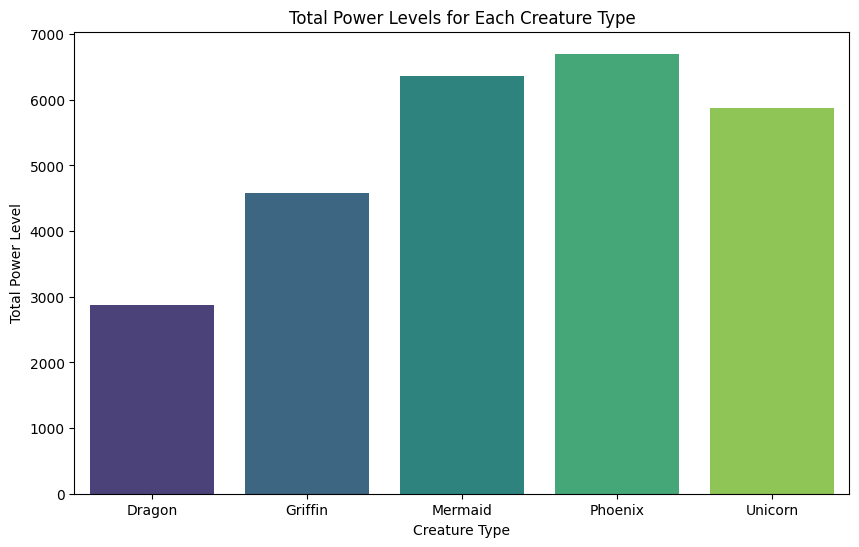

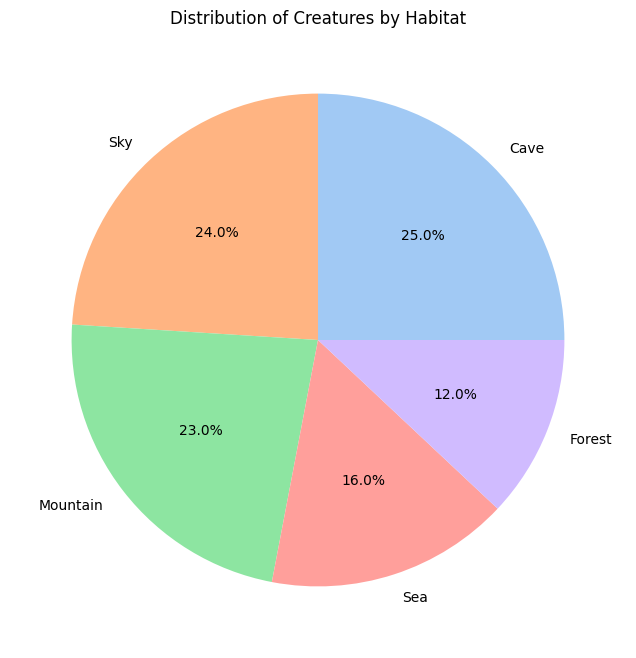

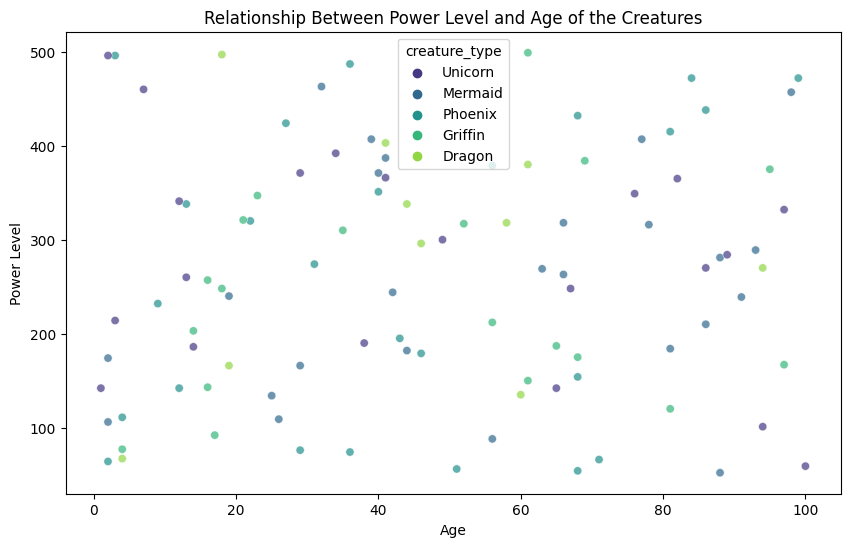

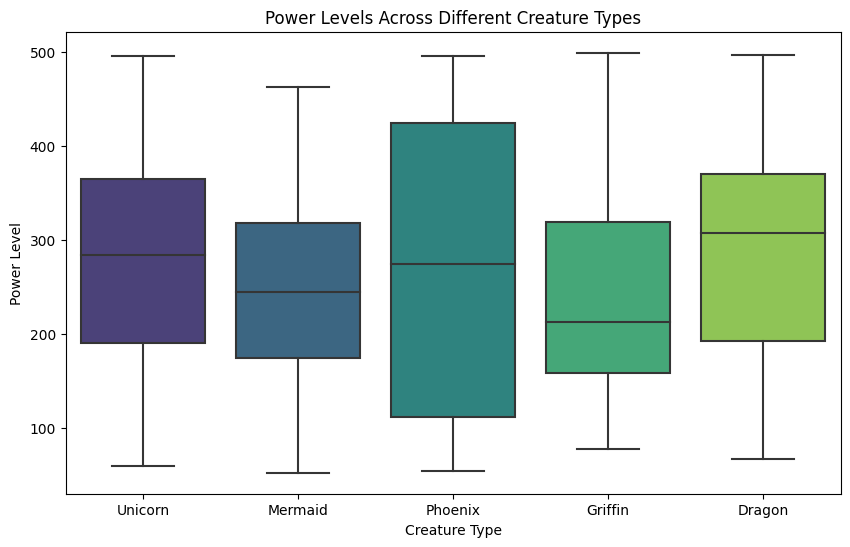

In [30]:
import seaborn as sns

# Step 1: Create a bar chart showing the total power levels for each creature type
plt.figure(figsize=(10, 6))
total_power_levels = mystical_creatures.groupby('creature_type')['power_level'].sum().reset_index()
sns.barplot(x='creature_type', y='power_level', data=total_power_levels, palette='viridis')
plt.title('Total Power Levels for Each Creature Type')
plt.xlabel('Creature Type')
plt.ylabel('Total Power Level')
plt.show()

# Step 2: Generate a pie chart representing the distribution of creatures by their habitat
plt.figure(figsize=(8, 8))
habitat_distribution = mystical_creatures['habitat'].value_counts()
plt.pie(habitat_distribution, labels=habitat_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Creatures by Habitat')
plt.show()

# Step 3: Plot a scatter plot to show the relationship between power level and age of the creatures
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='power_level', data=mystical_creatures, hue='creature_type', palette='viridis', alpha=0.7)
plt.title('Relationship Between Power Level and Age of the Creatures')
plt.xlabel('Age')
plt.ylabel('Power Level')
plt.show()

# Step 4: Create a box plot to compare the power levels across different creature types
plt.figure(figsize=(10, 6))
sns.boxplot(x='creature_type', y='power_level', data=mystical_creatures, palette='viridis')
plt.title('Power Levels Across Different Creature Types')
plt.xlabel('Creature Type')
plt.ylabel('Power Level')
plt.show()



# Q11 - Nested Data Labyrinth
<a id="q11"></a>

**Question:**
Welcome to the Nested Data Labyrinth! You are given a dataset of enchanted forests and the magical creatures that inhabit them. Each forest contains multiple creatures, and each creature has various attributes. Your task is to navigate through this nested data to answer the following questions:
1. Count the total number of creatures in each forest.
2. Calculate the average power level of creatures in each forest.
3. Identify the forest with the highest average age of creatures.
4. Determine the most common creature type in each forest.
5. Find the top 2 creatures with the highest power levels in each forest.

**Datasets:**
- `enchanted_forests`: Contains columns (forest_id, forest_name, creatures), where `creatures` is a list of dictionaries with keys (creature_id, creature_name, creature_type, age, power_level).

Generate synthetic data for the dataset and perform the required analysis to find the answers.


In [31]:
import pandas as pd
import numpy as np
import json

# Seed for reproducibility
np.random.seed(707)

# Generate synthetic data
forest_ids = np.arange(1, 6)
forest_names = ['Mystic Grove', 'Enchanted Woods', 'Faerie Forest', 'Dragon’s Den', 'Unicorn Utopia']
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']

data = []
for forest_id, forest_name in zip(forest_ids, forest_names):
    num_creatures = np.random.randint(5, 11)
    creatures = []
    for _ in range(num_creatures):
        creature_id = np.random.randint(1, 1001)
        creature_type = np.random.choice(creature_types)
        creature_name = np.random.choice(creature_names)
        age = np.random.randint(1, 101)
        power_level = np.random.randint(50, 501)
        creatures.append({
            'creature_id': creature_id,
            'creature_name': creature_name,
            'creature_type': creature_type,
            'age': age,
            'power_level': power_level
        })
    data.append([forest_id, forest_name, json.dumps(creatures)])

# Create DataFrame
enchanted_forests = pd.DataFrame(data, columns=['forest_id', 'forest_name', 'creatures'])

# Display the dataset
print("Enchanted Forests DataFrame:")
print(enchanted_forests.head())


Enchanted Forests DataFrame:
   forest_id      forest_name  \
0          1     Mystic Grove   
1          2  Enchanted Woods   
2          3    Faerie Forest   
3          4     Dragon’s Den   
4          5   Unicorn Utopia   

                                           creatures  
0  [{"creature_id": 250, "creature_name": "Sparkl...  
1  [{"creature_id": 866, "creature_name": "Draco"...  
2  [{"creature_id": 714, "creature_name": "Draco"...  
3  [{"creature_id": 245, "creature_name": "Ariel"...  
4  [{"creature_id": 173, "creature_name": "Ariel"...  


## Solution Explanation

The steps to solve this problem are:
1. Count the total number of creatures in each forest.
2. Calculate the average power level of creatures in each forest.
3. Identify the forest with the highest average age of creatures.
4. Determine the most common creature type in each forest.
5. Find the top 2 creatures with the highest power levels in each forest.

Let's implement these steps in the following code.


In [32]:
import json

# Helper function to extract creatures from JSON
def extract_creatures(row):
    return pd.DataFrame(json.loads(row['creatures']))

# Step 1: Count the total number of creatures in each forest
enchanted_forests['num_creatures'] = enchanted_forests['creatures'].apply(lambda x: len(json.loads(x)))
print("Step 1: Total Number of Creatures in Each Forest")
print(enchanted_forests[['forest_name', 'num_creatures']], "\n")

# Step 2: Calculate the average power level of creatures in each forest
enchanted_forests['avg_power_level'] = enchanted_forests['creatures'].apply(lambda x: pd.DataFrame(json.loads(x))['power_level'].mean())
print("Step 2: Average Power Level of Creatures in Each Forest")
print(enchanted_forests[['forest_name', 'avg_power_level']], "\n")

# Step 3: Identify the forest with the highest average age of creatures
enchanted_forests['avg_age'] = enchanted_forests['creatures'].apply(lambda x: pd.DataFrame(json.loads(x))['age'].mean())
forest_highest_avg_age = enchanted_forests.loc[enchanted_forests['avg_age'].idxmax()]
print("Step 3: Forest with the Highest Average Age of Creatures")
print(forest_highest_avg_age[['forest_name', 'avg_age']], "\n")

# Step 4: Determine the most common creature type in each forest
def most_common_creature_type(creatures_json):
    creatures_df = pd.DataFrame(json.loads(creatures_json))
    return creatures_df['creature_type'].mode().iloc[0]

enchanted_forests['most_common_creature_type'] = enchanted_forests['creatures'].apply(most_common_creature_type)
print("Step 4: Most Common Creature Type in Each Forest")
print(enchanted_forests[['forest_name', 'most_common_creature_type']], "\n")

# Step 5: Find the top 2 creatures with the highest power levels in each forest
def top_2_creatures(creatures_json):
    creatures_df = pd.DataFrame(json.loads(creatures_json))
    return creatures_df.nlargest(2, 'power_level')[['creature_name', 'power_level']]

enchanted_forests['top_2_creatures'] = enchanted_forests['creatures'].apply(top_2_creatures)
print("Step 5: Top 2 Creatures with the Highest Power Levels in Each Forest")
for index, row in enchanted_forests.iterrows():
    print(f"Forest: {row['forest_name']}")
    print(row['top_2_creatures'], "\n")


Step 1: Total Number of Creatures in Each Forest
       forest_name  num_creatures
0     Mystic Grove              8
1  Enchanted Woods              7
2    Faerie Forest              7
3     Dragon’s Den              5
4   Unicorn Utopia             10 

Step 2: Average Power Level of Creatures in Each Forest
       forest_name  avg_power_level
0     Mystic Grove       274.250000
1  Enchanted Woods       238.285714
2    Faerie Forest       293.571429
3     Dragon’s Den       226.600000
4   Unicorn Utopia       225.900000 

Step 3: Forest with the Highest Average Age of Creatures
forest_name    Unicorn Utopia
avg_age                  65.0
Name: 4, dtype: object 

Step 4: Most Common Creature Type in Each Forest
       forest_name most_common_creature_type
0     Mystic Grove                   Mermaid
1  Enchanted Woods                   Griffin
2    Faerie Forest                   Mermaid
3     Dragon’s Den                   Mermaid
4   Unicorn Utopia                   Griffin 

Step 5: 

# Q12 - Async Adventures in Data
<a id="q12"></a>

**Question:**
Welcome to Async Adventures in Data! You are given a dataset of magical quests undertaken by various whimsical characters. Each character can perform multiple quests, and each quest has different stages. Your task is to perform asynchronous data manipulation to answer the following questions:
1. Count the total number of quests each character has completed.
2. Calculate the average number of stages per quest for each character.
3. Identify the character with the highest average quest duration.
4. Determine the most common quest type for each character.
5. Find the character with the most diverse quest portfolio (i.e., highest number of unique quest types).

**Datasets:**
- `magical_quests`: Contains columns (character_id, character_name, quests), where `quests` is a list of dictionaries with keys (quest_id, quest_type, stages, duration).



In [33]:
import pandas as pd
import numpy as np
import json

# Seed for reproducibility
np.random.seed(808)

# Generate synthetic data
character_ids = np.arange(1, 11)
character_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
quest_types = ['Treasure Hunt', 'Dragon Slaying', 'Potion Making', 'Spell Casting', 'Rescue Mission']
stage_options = np.arange(1, 6)
duration_options = np.arange(1, 101)

data = []
for character_id, character_name in zip(character_ids, character_names):
    num_quests = np.random.randint(5, 11)
    quests = []
    for _ in range(num_quests):
        quest_id = int(np.random.randint(1, 1001))
        quest_type = np.random.choice(quest_types)
        stages = int(np.random.choice(stage_options))
        duration = int(np.random.choice(duration_options))
        quests.append({
            'quest_id': quest_id,
            'quest_type': quest_type,
            'stages': stages,
            'duration': duration
        })
    data.append([character_id, character_name, json.dumps(quests)])

# Create DataFrame
magical_quests = pd.DataFrame(data, columns=['character_id', 'character_name', 'quests'])

# Display the dataset
print("Magical Quests DataFrame:")
print(magical_quests.head())


Magical Quests DataFrame:
   character_id character_name  \
0             1          Frodo   
1             2        Gandalf   
2             3       Hermione   
3             4        Legolas   
4             5          Bilbo   

                                              quests  
0  [{"quest_id": 295, "quest_type": "Dragon Slayi...  
1  [{"quest_id": 947, "quest_type": "Potion Makin...  
2  [{"quest_id": 951, "quest_type": "Spell Castin...  
3  [{"quest_id": 531, "quest_type": "Treasure Hun...  
4  [{"quest_id": 566, "quest_type": "Potion Makin...  


## Solution Explanation

The steps to solve this problem are:
1. Count the total number of quests each character has completed.
2. Calculate the average number of stages per quest for each character.
3. Identify the character with the highest average quest duration.
4. Determine the most common quest type for each character.
5. Find the character with the most diverse quest portfolio (i.e., highest number of unique quest types).

Let's implement these steps in the following code.


In [34]:
import json

# Helper function to extract quests from JSON
def extract_quests(row):
    return pd.DataFrame(json.loads(row['quests']))

# Step 1: Count the total number of quests each character has completed
magical_quests['num_quests'] = magical_quests['quests'].apply(lambda x: len(json.loads(x)))
print("Step 1: Total Number of Quests Each Character Has Completed")
print(magical_quests[['character_name', 'num_quests']], "\n")

# Step 2: Calculate the average number of stages per quest for each character
magical_quests['avg_stages'] = magical_quests['quests'].apply(lambda x: pd.DataFrame(json.loads(x))['stages'].mean())
print("Step 2: Average Number of Stages per Quest for Each Character")
print(magical_quests[['character_name', 'avg_stages']], "\n")

# Step 3: Identify the character with the highest average quest duration
magical_quests['avg_duration'] = magical_quests['quests'].apply(lambda x: pd.DataFrame(json.loads(x))['duration'].mean())
character_highest_avg_duration = magical_quests.loc[magical_quests['avg_duration'].idxmax()]
print("Step 3: Character with the Highest Average Quest Duration")
print(character_highest_avg_duration[['character_name', 'avg_duration']], "\n")

# Step 4: Determine the most common quest type for each character
def most_common_quest_type(quests_json):
    quests_df = pd.DataFrame(json.loads(quests_json))
    return quests_df['quest_type'].mode().iloc[0]

magical_quests['most_common_quest_type'] = magical_quests['quests'].apply(most_common_quest_type)
print("Step 4: Most Common Quest Type for Each Character")
print(magical_quests[['character_name', 'most_common_quest_type']], "\n")

# Step 5: Find the character with the most diverse quest portfolio (i.e., highest number of unique quest types)
def unique_quest_types(quests_json):
    quests_df = pd.DataFrame(json.loads(quests_json))
    return quests_df['quest_type'].nunique()

magical_quests['num_unique_quest_types'] = magical_quests['quests'].apply(unique_quest_types)
character_most_diverse_quest_portfolio = magical_quests.loc[magical_quests['num_unique_quest_types'].idxmax()]
print("Step 5: Character with the Most Diverse Quest Portfolio")
print(character_most_diverse_quest_portfolio[['character_name', 'num_unique_quest_types']], "\n")


Step 1: Total Number of Quests Each Character Has Completed
  character_name  num_quests
0          Frodo          10
1        Gandalf           7
2       Hermione           8
3        Legolas           7
4          Bilbo           9
5      Galadriel           5
6     Dumbledore           7
7          Gimli           8
8          Harry           5
9        Aragorn           8 

Step 2: Average Number of Stages per Quest for Each Character
  character_name  avg_stages
0          Frodo    3.500000
1        Gandalf    2.714286
2       Hermione    3.625000
3        Legolas    3.000000
4          Bilbo    3.000000
5      Galadriel    2.000000
6     Dumbledore    3.285714
7          Gimli    2.875000
8          Harry    3.000000
9        Aragorn    3.500000 

Step 3: Character with the Highest Average Quest Duration
character_name    Harry
avg_duration       69.8
Name: 8, dtype: object 

Step 4: Most Common Quest Type for Each Character
  character_name most_common_quest_type
0          Frod

# Q13 - Geo Pandas Adventure
<a id="q13"></a>

**Question:**
Welcome to Geo Pandas Adventure! You are given a dataset of magical locations and the whimsical creatures that inhabit them. Each location has different environmental properties and magical attributes. Your task is to analyze this geographical data to answer the following questions:
1. Count the total number of unique creatures in each location.
2. Calculate the average magical energy level for each location.
3. Identify the location with the highest diversity of creature types.
4. Determine the most common magical attribute in each location.
5. Find the top 3 locations with the highest average environmental scores.

**Datasets:**
- `magical_locations`: Contains columns (location_id, location_name, creatures, magical_attributes, environmental_score), where `creatures` is a list of dictionaries with keys (creature_id, creature_name, creature_type, magical_energy).


In [35]:
import pandas as pd
import numpy as np
import json

# Seed for reproducibility
np.random.seed(909)

# Generate synthetic data
location_ids = np.arange(1, 6)
location_names = ['Mystic Mountain', 'Enchanted Forest', 'Faerie Glen', 'Dragon’s Lair', 'Unicorn Meadow']
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']
magical_attributes_options = ['Glowing Stones', 'Whispering Winds', 'Mystic Waters', 'Enchanted Trees', 'Floating Islands']
environmental_scores = np.random.randint(50, 101, size=len(location_ids))

data = []
for location_id, location_name in zip(location_ids, location_names):
    num_creatures = np.random.randint(5, 11)
    creatures = []
    for _ in range(num_creatures):
        creature_id = int(np.random.randint(1, 1001))
        creature_type = np.random.choice(creature_types)
        creature_name = np.random.choice(creature_names)
        magical_energy = int(np.random.randint(50, 501))
        creatures.append({
            'creature_id': creature_id,
            'creature_name': creature_name,
            'creature_type': creature_type,
            'magical_energy': magical_energy
        })
    magical_attributes = np.random.choice(magical_attributes_options, np.random.randint(1, 4), replace=False).tolist()
    data.append([location_id, location_name, json.dumps(creatures), magical_attributes, environmental_scores[location_id-1]])

# Create DataFrame
magical_locations = pd.DataFrame(data, columns=['location_id', 'location_name', 'creatures', 'magical_attributes', 'environmental_score'])

# Display the dataset
print("Magical Locations DataFrame:")
print(magical_locations.head())


Magical Locations DataFrame:
   location_id     location_name  \
0            1   Mystic Mountain   
1            2  Enchanted Forest   
2            3       Faerie Glen   
3            4     Dragon’s Lair   
4            5    Unicorn Meadow   

                                           creatures  \
0  [{"creature_id": 16, "creature_name": "Griff",...   
1  [{"creature_id": 764, "creature_name": "Griff"...   
2  [{"creature_id": 172, "creature_name": "Ariel"...   
3  [{"creature_id": 514, "creature_name": "Ariel"...   
4  [{"creature_id": 658, "creature_name": "Griff"...   

                                  magical_attributes  environmental_score  
0                                  [Enchanted Trees]                   78  
1                 [Floating Islands, Glowing Stones]                   96  
2                                    [Mystic Waters]                   82  
3  [Whispering Winds, Enchanted Trees, Mystic Wat...                   61  
4                                  [E

## Solution Explanation

The steps to solve this problem are:
1. Count the total number of unique creatures in each location.
2. Calculate the average magical energy level for each location.
3. Identify the location with the highest diversity of creature types.
4. Determine the most common magical attribute in each location.
5. Find the top 3 locations with the highest average environmental scores.

Let's implement these steps in the following code.


In [36]:
import json

# Helper function to extract creatures from JSON
def extract_creatures(row):
    return pd.DataFrame(json.loads(row['creatures']))

# Step 1: Count the total number of unique creatures in each location
magical_locations['num_unique_creatures'] = magical_locations['creatures'].apply(lambda x: len(json.loads(x)))
print("Step 1: Total Number of Unique Creatures in Each Location")
print(magical_locations[['location_name', 'num_unique_creatures']], "\n")

# Step 2: Calculate the average magical energy level for each location
magical_locations['avg_magical_energy'] = magical_locations['creatures'].apply(lambda x: pd.DataFrame(json.loads(x))['magical_energy'].mean())
print("Step 2: Average Magical Energy Level for Each Location")
print(magical_locations[['location_name', 'avg_magical_energy']], "\n")

# Step 3: Identify the location with the highest diversity of creature types
def creature_diversity(creatures_json):
    creatures_df = pd.DataFrame(json.loads(creatures_json))
    return creatures_df['creature_type'].nunique()

magical_locations['creature_diversity'] = magical_locations['creatures'].apply(creature_diversity)
location_highest_diversity = magical_locations.loc[magical_locations['creature_diversity'].idxmax()]
print("Step 3: Location with the Highest Diversity of Creature Types")
print(location_highest_diversity[['location_name', 'creature_diversity']], "\n")

# Step 4: Determine the most common magical attribute in each location
def most_common_attribute(attributes_list):
    return pd.Series(attributes_list).mode().iloc[0]

magical_locations['most_common_attribute'] = magical_locations['magical_attributes'].apply(most_common_attribute)
print("Step 4: Most Common Magical Attribute in Each Location")
print(magical_locations[['location_name', 'most_common_attribute']], "\n")

# Step 5: Find the top 3 locations with the highest average environmental scores
top_3_locations = magical_locations.nlargest(3, 'environmental_score')
print("Step 5: Top 3 Locations with the Highest Average Environmental Scores")
print(top_3_locations[['location_name', 'environmental_score']], "\n")


Step 1: Total Number of Unique Creatures in Each Location
      location_name  num_unique_creatures
0   Mystic Mountain                     5
1  Enchanted Forest                     8
2       Faerie Glen                     8
3     Dragon’s Lair                     6
4    Unicorn Meadow                    10 

Step 2: Average Magical Energy Level for Each Location
      location_name  avg_magical_energy
0   Mystic Mountain               284.0
1  Enchanted Forest               239.5
2       Faerie Glen               271.0
3     Dragon’s Lair               135.5
4    Unicorn Meadow               235.3 

Step 3: Location with the Highest Diversity of Creature Types
location_name         Unicorn Meadow
creature_diversity                 5
Name: 4, dtype: object 

Step 4: Most Common Magical Attribute in Each Location
      location_name most_common_attribute
0   Mystic Mountain       Enchanted Trees
1  Enchanted Forest      Floating Islands
2       Faerie Glen         Mystic Waters
3     D

# Q14 - Network Nexus Analysis
<a id="q14"></a>

**Question:**
Welcome to the Network Nexus Analysis! You are given a dataset of magical creatures and their social networks. Each creature has connections to other creatures, and each connection has a strength value indicating the closeness of their relationship. Your task is to analyze these social networks to answer the following questions:
1. Count the total number of connections each creature has.
2. Calculate the average connection strength for each creature.
3. Identify the creature with the highest average connection strength.
4. Determine the most connected creature (i.e., the creature with the most connections).
5. Find the top 3 creatures with the strongest total connection strength.

**Datasets:**
- `social_networks`: Contains columns (creature_id, creature_name, connections), where `connections` is a list of dictionaries with keys (connected_creature_id, connection_strength).


In [37]:
import pandas as pd
import numpy as np
import json

# Seed for reproducibility
np.random.seed(1010)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
connection_strengths = np.arange(1, 11)

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    num_connections = np.random.randint(3, 7)
    connections = []
    connected_creatures = np.random.choice(creature_ids[creature_ids != creature_id], num_connections, replace=False)
    for connected_creature_id in connected_creatures:
        connection_strength = np.random.choice(connection_strengths)
        connections.append({
            'connected_creature_id': int(connected_creature_id),
            'connection_strength': int(connection_strength)
        })
    data.append([creature_id, creature_name, json.dumps(connections)])

# Create DataFrame
social_networks = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'connections'])

# Display the dataset
print("Social Networks DataFrame:")
print(social_networks.head())


Social Networks DataFrame:
   creature_id creature_name  \
0            1         Frodo   
1            2       Gandalf   
2            3      Hermione   
3            4       Legolas   
4            5         Bilbo   

                                         connections  
0  [{"connected_creature_id": 3, "connection_stre...  
1  [{"connected_creature_id": 6, "connection_stre...  
2  [{"connected_creature_id": 7, "connection_stre...  
3  [{"connected_creature_id": 1, "connection_stre...  
4  [{"connected_creature_id": 3, "connection_stre...  


## Solution Explanation

The steps to solve this problem are:
1. Count the total number of connections each creature has.
2. Calculate the average connection strength for each creature.
3. Identify the creature with the highest average connection strength.
4. Determine the most connected creature (i.e., the creature with the most connections).
5. Find the top 3 creatures with the strongest total connection strength.

Let's implement these steps in the following code.


In [38]:
import json

# Helper function to extract connections from JSON
def extract_connections(row):
    return pd.DataFrame(json.loads(row['connections']))

# Step 1: Count the total number of connections each creature has
social_networks['num_connections'] = social_networks['connections'].apply(lambda x: len(json.loads(x)))
print("Step 1: Total Number of Connections Each Creature Has")
print(social_networks[['creature_name', 'num_connections']], "\n")

# Step 2: Calculate the average connection strength for each creature
social_networks['avg_connection_strength'] = social_networks['connections'].apply(lambda x: pd.DataFrame(json.loads(x))['connection_strength'].mean())
print("Step 2: Average Connection Strength for Each Creature")
print(social_networks[['creature_name', 'avg_connection_strength']], "\n")

# Step 3: Identify the creature with the highest average connection strength
creature_highest_avg_strength = social_networks.loc[social_networks['avg_connection_strength'].idxmax()]
print("Step 3: Creature with the Highest Average Connection Strength")
print(creature_highest_avg_strength[['creature_name', 'avg_connection_strength']], "\n")

# Step 4: Determine the most connected creature (i.e., the creature with the most connections)
creature_most_connections = social_networks.loc[social_networks['num_connections'].idxmax()]
print("Step 4: Most Connected Creature")
print(creature_most_connections[['creature_name', 'num_connections']], "\n")

# Step 5: Find the top 3 creatures with the strongest total connection strength
social_networks['total_connection_strength'] = social_networks['connections'].apply(lambda x: pd.DataFrame(json.loads(x))['connection_strength'].sum())
top_3_creatures = social_networks.nlargest(3, 'total_connection_strength')
print("Step 5: Top 3 Creatures with the Strongest Total Connection Strength")
print(top_3_creatures[['creature_name', 'total_connection_strength']], "\n")


Step 1: Total Number of Connections Each Creature Has
  creature_name  num_connections
0         Frodo                3
1       Gandalf                3
2      Hermione                5
3       Legolas                4
4         Bilbo                6
5     Galadriel                4
6    Dumbledore                6
7         Gimli                4
8         Harry                4
9       Aragorn                4 

Step 2: Average Connection Strength for Each Creature
  creature_name  avg_connection_strength
0         Frodo                 3.666667
1       Gandalf                 3.000000
2      Hermione                 5.800000
3       Legolas                 3.500000
4         Bilbo                 5.000000
5     Galadriel                 5.250000
6    Dumbledore                 6.166667
7         Gimli                 5.250000
8         Harry                 4.750000
9       Aragorn                 7.250000 

Step 3: Creature with the Highest Average Connection Strength
creature_nam

# Q15 - High Dimensional Hide and Seek
<a id="q15"></a>

**Question:**
Welcome to High Dimensional Hide and Seek! You are given a dataset of magical artifacts and their multidimensional properties. Each artifact has several attributes across different dimensions. Your task is to analyze these high-dimensional data to answer the following questions:
1. Count the total number of artifacts in each category.
2. Calculate the average value of each attribute for each category.
3. Identify the category with the highest average "magic intensity" attribute.
4. Determine the artifact with the highest combined value of all attributes.
5. Find the top 3 categories with the highest variance in "enchantment" attribute.

**Datasets:**
- `magical_artifacts`: Contains columns (artifact_id, category, attributes), where `attributes` is a dictionary with keys (magic_intensity, power_level, durability, enchantment, rarity).



In [39]:
import pandas as pd
import numpy as np
import json

# Seed for reproducibility
np.random.seed(1111)

# Generate synthetic data
artifact_ids = np.arange(1, 21)
categories = ['Wands', 'Potions', 'Amulets', 'Scrolls', 'Rings']
attributes_keys = ['magic_intensity', 'power_level', 'durability', 'enchantment', 'rarity']

data = []
for artifact_id in artifact_ids:
    category = np.random.choice(categories)
    attributes = {
        'magic_intensity': np.random.randint(1, 101),
        'power_level': np.random.randint(1, 101),
        'durability': np.random.randint(1, 101),
        'enchantment': np.random.randint(1, 101),
        'rarity': np.random.randint(1, 101)
    }
    data.append([artifact_id, category, json.dumps(attributes)])

# Create DataFrame
magical_artifacts = pd.DataFrame(data, columns=['artifact_id', 'category', 'attributes'])

# Display the dataset
print("Magical Artifacts DataFrame:")
print(magical_artifacts.head())


Magical Artifacts DataFrame:
   artifact_id category                                         attributes
0            1    Rings  {"magic_intensity": 56, "power_level": 82, "du...
1            2    Wands  {"magic_intensity": 23, "power_level": 21, "du...
2            3    Rings  {"magic_intensity": 87, "power_level": 9, "dur...
3            4  Amulets  {"magic_intensity": 77, "power_level": 95, "du...
4            5    Wands  {"magic_intensity": 10, "power_level": 10, "du...


## Solution Explanation

The steps to solve this problem are:
1. Count the total number of artifacts in each category.
2. Calculate the average value of each attribute for each category.
3. Identify the category with the highest average "magic intensity" attribute.
4. Determine the artifact with the highest combined value of all attributes.
5. Find the top 3 categories with the highest variance in "enchantment" attribute.

Let's implement these steps in the following code.


In [40]:
import json

# Helper function to extract attributes from JSON
def extract_attributes(row):
    return pd.Series(json.loads(row['attributes']))

# Step 1: Count the total number of artifacts in each category
artifact_count_per_category = magical_artifacts['category'].value_counts().reset_index()
artifact_count_per_category.columns = ['category', 'artifact_count']
print("Step 1: Total Number of Artifacts in Each Category")
print(artifact_count_per_category, "\n")

# Extract attributes into separate columns
attributes_df = magical_artifacts['attributes'].apply(lambda x: pd.Series(json.loads(x)))
magical_artifacts = pd.concat([magical_artifacts.drop(columns=['attributes']), attributes_df], axis=1)

# Step 2: Calculate the average value of each attribute for each category
avg_attributes_per_category = magical_artifacts.groupby('category')[attributes_keys].mean().reset_index()
print("Step 2: Average Value of Each Attribute for Each Category")
print(avg_attributes_per_category, "\n")

# Step 3: Identify the category with the highest average "magic intensity" attribute
category_highest_avg_magic_intensity = avg_attributes_per_category.loc[avg_attributes_per_category['magic_intensity'].idxmax()]
print("Step 3: Category with the Highest Average Magic Intensity")
print(category_highest_avg_magic_intensity, "\n")

# Step 4: Determine the artifact with the highest combined value of all attributes
magical_artifacts['total_attributes_value'] = magical_artifacts[attributes_keys].sum(axis=1)
artifact_highest_total_value = magical_artifacts.loc[magical_artifacts['total_attributes_value'].idxmax()]
print("Step 4: Artifact with the Highest Combined Value of All Attributes")
print(artifact_highest_total_value[['artifact_id', 'category', 'total_attributes_value']], "\n")

# Step 5: Find the top 3 categories with the highest variance in "enchantment" attribute
variance_enchantment_per_category = magical_artifacts.groupby('category')['enchantment'].var().reset_index()
top_3_categories_highest_variance_enchantment = variance_enchantment_per_category.nlargest(3, 'enchantment')
print("Step 5: Top 3 Categories with the Highest Variance in Enchantment")
print(top_3_categories_highest_variance_enchantment, "\n")


Step 1: Total Number of Artifacts in Each Category
  category  artifact_count
0    Rings               5
1  Scrolls               5
2  Potions               4
3    Wands               3
4  Amulets               3 

Step 2: Average Value of Each Attribute for Each Category
  category  magic_intensity  power_level  durability  enchantment     rarity
0  Amulets        66.000000         72.0   33.000000    48.333333  46.333333
1  Potions        63.000000         51.0   62.000000    33.000000  34.750000
2    Rings        50.400000         63.0   23.600000    58.400000  59.200000
3  Scrolls        34.400000         36.4   74.200000    51.200000  57.800000
4    Wands        33.666667         32.0   34.333333    30.666667  33.333333 

Step 3: Category with the Highest Average Magic Intensity
category             Amulets
magic_intensity         66.0
power_level             72.0
durability              33.0
enchantment        48.333333
rarity             46.333333
Name: 0, dtype: object 

Step 4

# Q16 - Real-time Data Rush
<a id="q16"></a>

**Question:**
Welcome to Real-time Data Rush! You are given a dataset of magical creatures and their real-time activities. Each creature performs various activities with different durations throughout the day. Your task is to analyze this time-based data to answer the following questions:
1. Calculate the total duration of activities for each creature.
2. Determine the creature with the longest single activity duration.
3. Identify the most common activity performed by each creature.
4. Calculate the average activity duration for each type of activity across all creatures.
5. Find the top 3 creatures with the highest average activity duration.

**Datasets:**
- `creature_activities`: Contains columns (creature_id, creature_name, activity, duration), where `activity` is the type of activity and `duration` is the time spent on that activity in minutes.



In [41]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(1212)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
activities = ['Flying', 'Potion Making', 'Spell Casting', 'Herb Gathering', 'Treasure Hunting']
durations = np.arange(1, 121)  # Durations from 1 to 120 minutes

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    num_activities = np.random.randint(5, 15)
    for _ in range(num_activities):
        activity = np.random.choice(activities)
        duration = np.random.choice(durations)
        data.append([creature_id, creature_name, activity, duration])

# Create DataFrame
creature_activities = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'activity', 'duration'])

# Display the dataset
print("Creature Activities DataFrame:")
print(creature_activities.head())


Creature Activities DataFrame:
   creature_id creature_name          activity  duration
0            1         Frodo     Spell Casting        55
1            1         Frodo     Spell Casting        81
2            1         Frodo     Potion Making        34
3            1         Frodo    Herb Gathering        83
4            1         Frodo  Treasure Hunting        40


## Solution Explanation

The steps to solve this problem are:
1. Calculate the total duration of activities for each creature.
2. Determine the creature with the longest single activity duration.
3. Identify the most common activity performed by each creature.
4. Calculate the average activity duration for each type of activity across all creatures.
5. Find the top 3 creatures with the highest average activity duration.

Let's implement these steps in the following code.


In [42]:
# Step 1: Calculate the total duration of activities for each creature
total_duration_per_creature = creature_activities.groupby('creature_name')['duration'].sum().reset_index()
total_duration_per_creature.columns = ['creature_name', 'total_duration']
print("Step 1: Total Duration of Activities for Each Creature")
print(total_duration_per_creature, "\n")

# Step 2: Determine the creature with the longest single activity duration
longest_single_activity = creature_activities.loc[creature_activities['duration'].idxmax()]
print("Step 2: Creature with the Longest Single Activity Duration")
print(longest_single_activity[['creature_name', 'activity', 'duration']], "\n")

# Step 3: Identify the most common activity performed by each creature
most_common_activity_per_creature = creature_activities.groupby('creature_name')['activity'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_common_activity_per_creature.columns = ['creature_name', 'most_common_activity']
print("Step 3: Most Common Activity Performed by Each Creature")
print(most_common_activity_per_creature, "\n")

# Step 4: Calculate the average activity duration for each type of activity across all creatures
average_duration_per_activity = creature_activities.groupby('activity')['duration'].mean().reset_index()
average_duration_per_activity.columns = ['activity', 'average_duration']
print("Step 4: Average Activity Duration for Each Type of Activity Across All Creatures")
print(average_duration_per_activity, "\n")

# Step 5: Find the top 3 creatures with the highest average activity duration
average_duration_per_creature = creature_activities.groupby('creature_name')['duration'].mean().reset_index()
average_duration_per_creature.columns = ['creature_name', 'average_duration']
top_3_creatures_highest_avg_duration = average_duration_per_creature.nlargest(3, 'average_duration')
print("Step 5: Top 3 Creatures with the Highest Average Activity Duration")
print(top_3_creatures_highest_avg_duration, "\n")


Step 1: Total Duration of Activities for Each Creature
  creature_name  total_duration
0       Aragorn             324
1         Bilbo             387
2    Dumbledore             330
3         Frodo             758
4     Galadriel             535
5       Gandalf             188
6         Gimli             533
7         Harry             370
8      Hermione             611
9       Legolas             344 

Step 2: Creature with the Longest Single Activity Duration
creature_name       Dumbledore
activity         Potion Making
duration                   116
Name: 50, dtype: object 

Step 3: Most Common Activity Performed by Each Creature
  creature_name most_common_activity
0       Aragorn     Treasure Hunting
1         Bilbo        Potion Making
2    Dumbledore               Flying
3         Frodo        Spell Casting
4     Galadriel               Flying
5       Gandalf               Flying
6         Gimli       Herb Gathering
7         Harry     Treasure Hunting
8      Hermione         

# Q17 - Machine Learning Preprocess Pandemonium
<a id="q17"></a>

**Question:**
Welcome to Machine Learning Preprocess Pandemonium! You are given a dataset of magical creatures and their attributes. Your task is to perform various preprocessing steps commonly used in machine learning to answer the following questions:
1. Normalize the attributes of the creatures.
2. Encode the categorical features of the dataset.
3. Identify and handle any missing values.
4. Perform feature selection to identify the most important attributes.
5. Split the dataset into training and testing sets.

**Datasets:**
- `creature_attributes`: Contains columns (creature_id, creature_name, creature_type, magic_power, agility, intelligence, strength, loyalty).



In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Seed for reproducibility
np.random.seed(1313)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
creature_types = ['Wizard', 'Elf', 'Hobbit', 'Human', 'Dwarf']
attributes = {
    'magic_power': np.random.randint(1, 101, size=20),
    'agility': np.random.randint(1, 101, size=20),
    'intelligence': np.random.randint(1, 101, size=20),
    'strength': np.random.randint(1, 101, size=20),
    'loyalty': np.random.randint(1, 101, size=20)
}

data = []
for creature_id in creature_ids:
    creature_name = np.random.choice(creature_names)
    creature_type = np.random.choice(creature_types)
    magic_power = attributes['magic_power'][creature_id - 1]
    agility = attributes['agility'][creature_id - 1]
    intelligence = attributes['intelligence'][creature_id - 1]
    strength = attributes['strength'][creature_id - 1]
    loyalty = attributes['loyalty'][creature_id - 1]
    data.append([creature_id, creature_name, creature_type, magic_power, agility, intelligence, strength, loyalty])

# Introduce some missing values
data[3][3] = np.nan
data[7][5] = np.nan

# Create DataFrame
creature_attributes = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'creature_type', 'magic_power', 'agility', 'intelligence', 'strength', 'loyalty'])

# Display the dataset
print("Creature Attributes DataFrame:")
print(creature_attributes.head())


Creature Attributes DataFrame:
   creature_id creature_name creature_type  magic_power  agility  \
0            1    Dumbledore        Wizard         52.0       97   
1            2         Bilbo           Elf         97.0       64   
2            3       Legolas         Human         43.0        5   
3            4      Hermione         Dwarf          NaN       17   
4            5         Frodo        Hobbit         71.0       73   

   intelligence  strength  loyalty  
0          64.0        48       75  
1          70.0        60       76  
2          84.0         6       77  
3          61.0        54       48  
4          81.0        49       71  


## Solution Explanation

The steps to solve this problem are:
1. Normalize the attributes of the creatures.
2. Encode the categorical features of the dataset.
3. Identify and handle any missing values.
4. Perform feature selection to identify the most important attributes.
5. Split the dataset into training and testing sets.

Let's implement these steps in the following code.


In [44]:
# Step 1: Normalize the attributes of the creatures
scaler = StandardScaler()
attributes = creature_attributes[['magic_power', 'agility', 'intelligence', 'strength', 'loyalty']]
attributes_scaled = scaler.fit_transform(attributes)
attributes_scaled_df = pd.DataFrame(attributes_scaled, columns=attributes.columns)
creature_attributes_scaled = pd.concat([creature_attributes[['creature_id', 'creature_name', 'creature_type']], attributes_scaled_df], axis=1)
print("Step 1: Normalized Attributes")
print(creature_attributes_scaled.head(), "\n")

# Step 2: Encode the categorical features of the dataset
encoder = OneHotEncoder(sparse_output=False)
creature_types_encoded = encoder.fit_transform(creature_attributes[['creature_type']])
creature_types_encoded_df = pd.DataFrame(creature_types_encoded, columns=encoder.get_feature_names_out(['creature_type']))
creature_attributes_encoded = pd.concat([creature_attributes_scaled.drop(columns=['creature_type']), creature_types_encoded_df], axis=1)
print("Step 2: Encoded Categorical Features")
print(creature_attributes_encoded.head(), "\n")

# Step 3: Identify and handle any missing values
imputer = SimpleImputer(strategy='mean')
attributes_imputed = imputer.fit_transform(creature_attributes_encoded.drop(columns=['creature_id', 'creature_name']))
attributes_imputed_df = pd.DataFrame(attributes_imputed, columns=creature_attributes_encoded.drop(columns=['creature_id', 'creature_name']).columns)
creature_attributes_imputed = pd.concat([creature_attributes_encoded[['creature_id', 'creature_name']], attributes_imputed_df], axis=1)
print("Step 3: Handle Missing Values")
print(creature_attributes_imputed.head(), "\n")

# Step 4: Perform feature selection to identify the most important attributes
X = creature_attributes_imputed.drop(columns=['creature_id', 'creature_name'])
y = np.random.choice([0, 1], size=len(X))  # Random target variable for demonstration purposes
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Step 4: Selected Features")
print(selected_features, "\n")

# Step 5: Split the dataset into training and testing sets
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print("Step 5: Split Dataset into Training and Testing Sets")
print("Training Set:")
print(X_train.head(), "\n")
print("Testing Set:")
print(X_test.head(), "\n")


Step 1: Normalized Attributes
   creature_id creature_name creature_type  magic_power   agility  \
0            1    Dumbledore        Wizard     0.076227  1.546702   
1            2         Bilbo           Elf     1.557458  0.429827   
2            3       Legolas         Human    -0.220019 -1.567009   
3            4      Hermione         Dwarf          NaN -1.160872   
4            5         Frodo        Hobbit     0.701636  0.734430   

   intelligence  strength   loyalty  
0     -0.027481 -0.052329  0.337526  
1      0.213504  0.328245  0.375450  
2      0.775803 -1.384336  0.413374  
3     -0.147973  0.137958 -0.686429  
4      0.655311 -0.020614  0.185829   

Step 2: Encoded Categorical Features
   creature_id creature_name  magic_power   agility  intelligence  strength  \
0            1    Dumbledore     0.076227  1.546702     -0.027481 -0.052329   
1            2         Bilbo     1.557458  0.429827      0.213504  0.328245   
2            3       Legolas    -0.220019 -1.567009

# Q18 - Text Tango with Pandas
<a id="q18"></a>

**Question:**
Welcome to Text Tango with Pandas! You are given a dataset of magical creatures and their quirky catchphrases. Each creature has a unique set of catchphrases, and your task is to perform various text analysis operations to answer the following questions:
1. Count the total number of unique words used by each creature.
2. Identify the most common word across all catchphrases.
3. Determine the average length of catchphrases for each creature.
4. Find the creature with the longest single catchphrase.
5. Create a word cloud visualization for the catchphrases of the top 3 creatures with the most unique words.

**Datasets:**
- `creature_catchphrases`: Contains columns (creature_id, creature_name, catchphrases), where `catchphrases` is a list of strings representing the catchphrases.


In [45]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1414)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
catchphrases_list = [
    ["A wizard is never late", "Fly you fools", "You shall not pass"],
    ["Expecto Patronum", "It's Leviosa, not Leviosar", "I solemnly swear that I am up to no good"],
    ["I am not a number, I am a free man", "To infinity and beyond", "May the force be with you"],
    ["Winter is coming", "You know nothing, Jon Snow", "Hold the door"],
    ["Inconceivable", "My name is Inigo Montoya", "You killed my father, prepare to die"],
    ["Hakuna Matata", "Just keep swimming", "To infinity and beyond"],
    ["Here's looking at you, kid", "I'll be back", "Hasta la vista, baby"],
    ["I see dead people", "You can't handle the truth", "I feel the need, the need for speed"],
    ["Houston, we have a problem", "You had me at hello", "Show me the money"],
    ["I'm king of the world", "Nobody puts Baby in a corner", "I am Groot"]
]

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    catchphrases = np.random.choice(catchphrases_list[np.random.randint(0, len(catchphrases_list))], np.random.randint(3, 6)).tolist()
    data.append([creature_id, creature_name, catchphrases])

# Create DataFrame
creature_catchphrases = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'catchphrases'])

# Display the dataset
print("Creature Catchphrases DataFrame:")
print(creature_catchphrases.head())


Creature Catchphrases DataFrame:
   creature_id creature_name  \
0            1         Frodo   
1            2       Gandalf   
2            3      Hermione   
3            4       Legolas   
4            5         Bilbo   

                                        catchphrases  
0  [To infinity and beyond, May the force be with...  
1  [Houston, we have a problem, Houston, we have ...  
2  [You can't handle the truth, I feel the need, ...  
3  [You know nothing, Jon Snow, You know nothing,...  
4  [Fly you fools, A wizard is never late, A wiza...  


## Solution Explanation

The steps to solve this problem are:
1. Count the total number of unique words used by each creature.
2. Identify the most common word across all catchphrases.
3. Determine the average length of catchphrases for each creature.
4. Find the creature with the longest single catchphrase.
5. Create a word cloud visualization for the catchphrases of the top 3 creatures with the most unique words.

Let's implement these steps in the following code.


Step 1: Total Number of Unique Words Used by Each Creature
  creature_name  unique_word_count
0         Frodo                 10
1       Gandalf                 10
2      Hermione                 14
3       Legolas                  5
4         Bilbo                  8
5     Galadriel                 14
6    Dumbledore                 14
7         Gimli                  9
8         Harry                  9
9       Aragorn                 11 

Step 2: Most Common Word Across All Catchphrases
('the', 16) 

Step 3: Average Length of Catchphrases for Each Creature
  creature_name  average_catchphrase_length
0         Frodo                    4.666667
1       Gandalf                    5.000000
2      Hermione                    5.500000
3       Legolas                    5.000000
4         Bilbo                    4.500000
5     Galadriel                    5.200000
6    Dumbledore                    6.250000
7         Gimli                    3.000000
8         Harry                    4.3

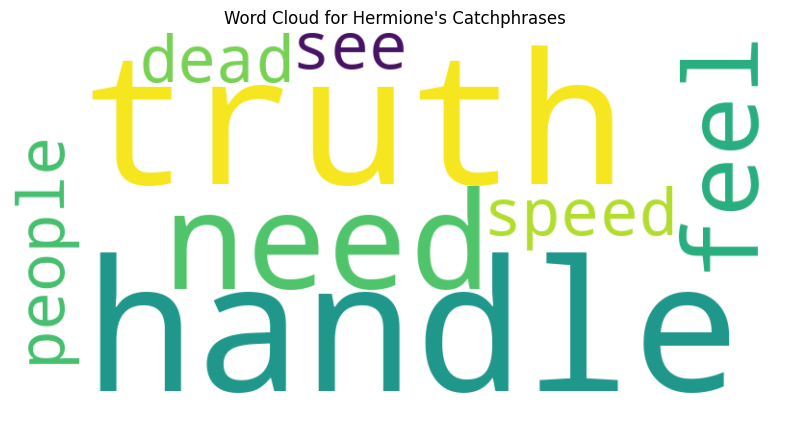

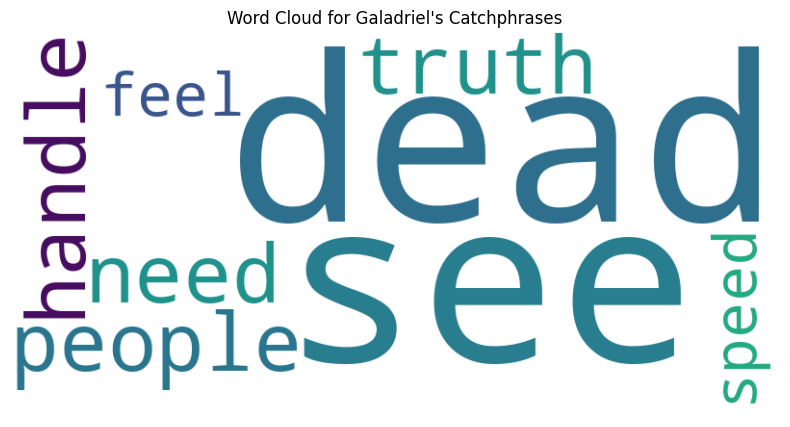

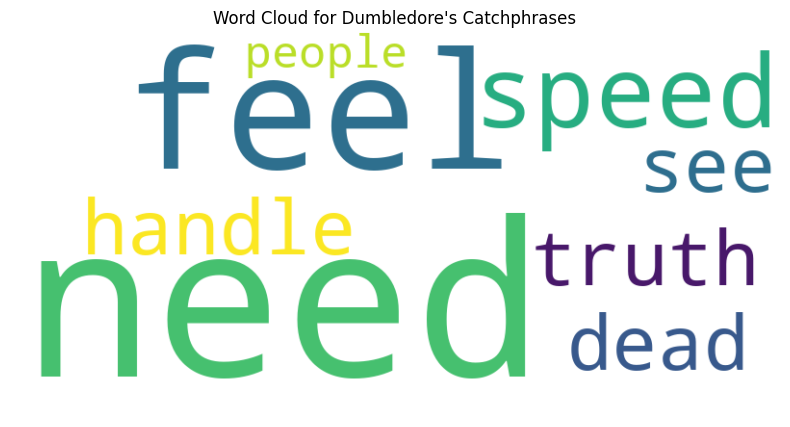

In [46]:
import re

# Helper function to count unique words
def count_unique_words(catchphrases):
    words = re.findall(r'\b\w+\b', ' '.join(catchphrases).lower())
    return len(set(words))

# Step 1: Count the total number of unique words used by each creature
creature_catchphrases['unique_word_count'] = creature_catchphrases['catchphrases'].apply(count_unique_words)
print("Step 1: Total Number of Unique Words Used by Each Creature")
print(creature_catchphrases[['creature_name', 'unique_word_count']], "\n")

# Step 2: Identify the most common word across all catchphrases
all_words = re.findall(r'\b\w+\b', ' '.join([' '.join(catchphrases) for catchphrases in creature_catchphrases['catchphrases']]).lower())
most_common_word = Counter(all_words).most_common(1)[0]
print("Step 2: Most Common Word Across All Catchphrases")
print(most_common_word, "\n")

# Step 3: Determine the average length of catchphrases for each creature
creature_catchphrases['average_catchphrase_length'] = creature_catchphrases['catchphrases'].apply(lambda x: np.mean([len(phrase.split()) for phrase in x]))
print("Step 3: Average Length of Catchphrases for Each Creature")
print(creature_catchphrases[['creature_name', 'average_catchphrase_length']], "\n")

# Step 4: Find the creature with the longest single catchphrase
creature_catchphrases['longest_catchphrase'] = creature_catchphrases['catchphrases'].apply(lambda x: max(x, key=len))
creature_with_longest_catchphrase = creature_catchphrases.loc[creature_catchphrases['longest_catchphrase'].apply(len).idxmax()]
print("Step 4: Creature with the Longest Single Catchphrase")
print(creature_with_longest_catchphrase[['creature_name', 'longest_catchphrase']], "\n")

# Step 5: Create a word cloud visualization for the catchphrases of the top 3 creatures with the most unique words
top_3_creatures = creature_catchphrases.nlargest(3, 'unique_word_count')

for i, row in top_3_creatures.iterrows():
    text = ' '.join(row['catchphrases'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {row['creature_name']}'s Catchphrases")
    plt.axis('off')
    plt.show()


# Q19 - Anomaly Detection Drama
<a id="q19"></a>

**Question:**
Welcome to Anomaly Detection Drama! You are given a dataset of enchanted items and their magical properties. Each item has various attributes, and your task is to detect anomalies in this dataset to answer the following questions:
1. Identify the items with the highest outlier scores based on their attributes.
2. Determine the average value of each attribute for the non-anomalous items.
3. Calculate the number of anomalies detected for each item category.
4. Find the item with the most extreme outlier score in each category.
5. Visualize the distribution of outlier scores across all items using a box plot.

**Datasets:**
- `enchanted_items`: Contains columns (item_id, item_name, category, power_level, enchantment_level, durability, rarity, age).

Generate synthetic data for the dataset and perform the required analysis to find the answers.


In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1515)

# Generate synthetic data
item_ids = np.arange(1, 51)
item_names = [f'Item_{i}' for i in item_ids]
categories = ['Wand', 'Potion', 'Amulet', 'Scroll', 'Ring']
attributes = {
    'power_level': np.random.randint(1, 101, size=50),
    'enchantment_level': np.random.randint(1, 101, size=50),
    'durability': np.random.randint(1, 101, size=50),
    'rarity': np.random.randint(1, 101, size=50),
    'age': np.random.randint(1, 101, size=50)
}

data = []
for item_id, item_name in zip(item_ids, item_names):
    category = np.random.choice(categories)
    power_level = attributes['power_level'][item_id - 1]
    enchantment_level = attributes['enchantment_level'][item_id - 1]
    durability = attributes['durability'][item_id - 1]
    rarity = attributes['rarity'][item_id - 1]
    age = attributes['age'][item_id - 1]
    data.append([item_id, item_name, category, power_level, enchantment_level, durability, rarity, age])

# Create DataFrame
enchanted_items = pd.DataFrame(data, columns=['item_id', 'item_name', 'category', 'power_level', 'enchantment_level', 'durability', 'rarity', 'age'])

# Display the dataset
print("Enchanted Items DataFrame:")
print(enchanted_items.head())


Enchanted Items DataFrame:
   item_id item_name category  power_level  enchantment_level  durability  \
0        1    Item_1   Scroll           72                 29          90   
1        2    Item_2   Amulet           41                 56           5   
2        3    Item_3   Potion           71                 58          51   
3        4    Item_4   Amulet           15                 27          55   
4        5    Item_5   Amulet           96                 54          23   

   rarity  age  
0      45   91  
1       6   67  
2      12   29  
3       7   24  
4      50   54  


## Solution Explanation

The steps to solve this problem are:
1. Identify the items with the highest outlier scores based on their attributes.
2. Determine the average value of each attribute for the non-anomalous items.
3. Calculate the number of anomalies detected for each item category.
4. Find the item with the most extreme outlier score in each category.

Let's implement these steps in the following code.


In [48]:
from sklearn.ensemble import IsolationForest

# Step 1: Identify the items with the highest outlier scores based on their attributes
attributes = enchanted_items[['power_level', 'enchantment_level', 'durability', 'rarity', 'age']]

# Convert attributes to a numpy array for fitting the model
attributes_array = attributes.values

iso_forest = IsolationForest(contamination=0.1, random_state=1515)
iso_forest.fit(attributes_array)

# Calculate the outlier scores and predictions
enchanted_items['outlier_score'] = -iso_forest.decision_function(attributes_array)
enchanted_items['is_anomaly'] = iso_forest.predict(attributes_array) == -1

print("Step 1: Items with the Highest Outlier Scores")
print(enchanted_items.sort_values(by='outlier_score', ascending=False).head(), "\n")

# Step 2: Determine the average value of each attribute for the non-anomalous items
non_anomalous_items = enchanted_items[enchanted_items['is_anomaly'] == False]
avg_attributes_non_anomalous = non_anomalous_items[['power_level', 'enchantment_level', 'durability', 'rarity', 'age']].mean()
print("Step 2: Average Value of Each Attribute for Non-Anomalous Items")
print(avg_attributes_non_anomalous, "\n")

# Step 3: Calculate the number of anomalies detected for each item category
anomalies_per_category = enchanted_items[enchanted_items['is_anomaly'] == True].groupby('category').size().reset_index(name='num_anomalies')
print("Step 3: Number of Anomalies Detected for Each Item Category")
print(anomalies_per_category, "\n")

# Step 4: Find the item with the most extreme outlier score in each category
extreme_outliers_per_category = enchanted_items.loc[enchanted_items.groupby('category')['outlier_score'].idxmax()]
print("Step 4: Item with the Most Extreme Outlier Score in Each Category")
print(extreme_outliers_per_category[['category', 'item_name', 'outlier_score']], "\n")




Step 1: Items with the Highest Outlier Scores
    item_id item_name category  power_level  enchantment_level  durability  \
45       46   Item_46     Ring           99                 88          13   
41       42   Item_42     Ring           86                 26          61   
10       11   Item_11   Potion            3                 11           8   
33       34   Item_34   Amulet           97                100          78   
15       16   Item_16   Amulet           40                 14          51   

    rarity  age  outlier_score  is_anomaly  
45      29  100       0.026758        True  
41       1    2       0.013026        True  
10      24   74       0.009622        True  
33      35   61       0.005153        True  
15      97   25       0.002359        True   

Step 2: Average Value of Each Attribute for Non-Anomalous Items
power_level          50.511111
enchantment_level    49.933333
durability           55.200000
rarity               49.177778
age                  46.2

# Q20 - Imputation Imbroglio
<a id="q20"></a>

**Question:**
Welcome to Imputation Imbroglio! You are given a dataset of mystical potions and their unique attributes. Each potion has various properties, and some of these properties have missing values. Your task is to handle these missing values to answer the following questions:
1. Impute the missing values using the mean for numeric attributes.
2. Impute the missing values using the most frequent value for categorical attributes.
3. Calculate the mean and median of each numeric attribute after imputation.
4. Determine the most common value for each categorical attribute after imputation.
5. Create visualizations to compare the distribution of attributes before and after imputation.

**Datasets:**
- `mystical_potions`: Contains columns (potion_id, potion_name, type, potency, color, viscosity, rarity).


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Seed for reproducibility
np.random.seed(2020)

# Generate synthetic data
potion_ids = np.arange(1, 21)
potion_names = [f'Potion_{i}' for i in potion_ids]
types = ['Healing', 'Mana', 'Strength', 'Speed', 'Invisibility']
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']
attributes = {
    'potency': np.random.randint(1, 101, size=20).astype(float),
    'viscosity': np.random.uniform(0.1, 1.0, size=20).astype(float),
    'rarity': np.random.randint(1, 11, size=20).astype(float)
}

data = []
for potion_id, potion_name in zip(potion_ids, potion_names):
    type_ = np.random.choice(types)
    color = np.random.choice(colors)
    potency = attributes['potency'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    viscosity = attributes['viscosity'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    rarity = attributes['rarity'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    data.append([potion_id, potion_name, type_, potency, color, viscosity, rarity])

# Create DataFrame
mystical_potions = pd.DataFrame(data, columns=['potion_id', 'potion_name', 'type', 'potency', 'color', 'viscosity', 'rarity'])

# Display the dataset
print("Mystical Potions DataFrame:")
print(mystical_potions.head())


Mystical Potions DataFrame:
   potion_id potion_name      type  potency   color  viscosity  rarity
0          1    Potion_1      Mana     97.0    Blue   0.762692     8.0
1          2    Potion_2   Healing      9.0   Green   0.420097     2.0
2          3    Potion_3     Speed     68.0     Red   0.406984     1.0
3          4    Potion_4     Speed     68.0  Purple        NaN     3.0
4          5    Potion_5  Strength      NaN   Green   0.295391     9.0


## Solution Explanation

The steps to solve this problem are:
1. Impute the missing values using the mean for numeric attributes.
2. Impute the missing values using the most frequent value for categorical attributes.
3. Calculate the mean and median of each numeric attribute after imputation.
4. Determine the most common value for each categorical attribute after imputation.
Let's implement these steps in the following code.


In [50]:
# Step 1: Impute the missing values using the mean for numeric attributes
numeric_attributes = ['potency', 'viscosity', 'rarity']
numeric_imputer = SimpleImputer(strategy='mean')
mystical_potions[numeric_attributes] = numeric_imputer.fit_transform(mystical_potions[numeric_attributes])

# Step 2: Impute the missing values using the most frequent value for categorical attributes
categorical_attributes = ['type', 'color']
categorical_imputer = SimpleImputer(strategy='most_frequent')
mystical_potions[categorical_attributes] = categorical_imputer.fit_transform(mystical_potions[categorical_attributes])

# Step 3: Calculate the mean and median of each numeric attribute after imputation
mean_values = mystical_potions[numeric_attributes].mean()
median_values = mystical_potions[numeric_attributes].median()
print("Step 3: Mean and Median of Each Numeric Attribute After Imputation")
print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values, "\n")

# Step 4: Determine the most common value for each categorical attribute after imputation
most_common_values = mystical_potions[categorical_attributes].mode().iloc[0]
print("Step 4: Most Common Value for Each Categorical Attribute After Imputation")
print(most_common_values, "\n")

Step 3: Mean and Median of Each Numeric Attribute After Imputation
Mean Values:
 potency      52.937500
viscosity     0.504048
rarity        5.950000
dtype: float64
Median Values:
 potency      52.937500
viscosity     0.504048
rarity        6.500000
dtype: float64 

Step 4: Most Common Value for Each Categorical Attribute After Imputation
type      Mana
color    Green
Name: 0, dtype: object 



---

## Thanks for Checking Out My Notebook!

I hope you enjoyed the **🌋 Pandas Mastery Series - Ultimate Challenge** and found it helpful in improving your data manipulation skills. If you have any questions, suggestions, or feedback, feel free to reach out. Your input is greatly appreciated!

#### Show Your Support
If you found this notebook useful, please consider giving it an upvote. Your support helps me create more high-quality content!

#### Connect with Me
- [Kaggle Profile](kaggle.com/code/matinmahmoudi)
- [LinkedIn](https://www.linkedin.com/in/matinmahmoudicom/)
- [GitHub](https://github.com/matinmahmoudi/)

## Ask Questions
If you have any questions or need further clarification, don't hesitate to ask. I'm here to help!

Happy Coding! 🚀

---
